## Preliminaries

In [ ]:
!pip install matplotlib==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.3 MB 6.1 MB/s 
     |████████████████████████████████| 965 kB 49.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
# Mount Google Drive.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys
from datetime import datetime
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
print(matplotlib.__version__)

# Import local packages.
path = "/content/drive/MyDrive/Projects"

sys.path.append(f'{path}/quantus')
#import quantus

sys.path.append(f'{path}/MetaQuantus')
import metaquantus
from metaquantus.utils import *
from metaquantus.models import *

#%load_ext autoreload
#%autoreload 2 

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Mounted at /content/drive
3.5.1


In [2]:
path_results = "/content/drive/MyDrive/Projects/MetaQuantus/results/"

##########################
# Experimental settings. #
##########################

datasets = ["cMNIST", "MNIST", "fMNIST", "ImageNet"]
categories = ['Complexity', 'Localisation', 'Randomisation', 'Faithfulness', 'Robustness']
xai_methods = ['Gradient', 'Saliency', 'GradCAM', 'IntegratedGradients']
models = {"MNIST": "LeNet", "fMNIST": "LeNet", "cMNIST": "ResNet9", "ImageNet": "ResNet18"}

########################
# Estimators, metrics. #
########################

estimators = { "Complexity": ["Sparseness", "Complexity"], "Faithfulness": ["Faithfulness Correlation", "Pixel-Flipping"], "Localisation": ["Pointing-Game", "Relevance Mass Accuracy"], "Randomisation": ["Random Logit", "Model Parameter Randomisation Test"], "Robustness": ["Max-Sensitivity", "Local Lipschitz Estimate"], }
metrics = ['Sparseness', 'Complexity', 'Faithfulness Correlation', 'Pixel-Flipping', 'Pointing-Game', 'Relevance Mass Accuracy', 'Random Logit', 'Model Parameter Randomisation Test', 'Max-Sensitivity', 'Local Lipschitz Estimate']

#############################
# Analyser suites, results. #
#############################
results = ['intra_scores', 'inter_scores', 'eval_scores', 'eval_scores_perturbed', 'indices_perturbed']
analyser_suite = ["Model Resilience Test", "Input Resilience Test",  "Model Adversary Test", "Input Adversary Test"]

### Plotting configs

In [3]:
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
hatches = ['//', '\\\\', '||', '--', '++', 'xx', 'oo', 'OO', '..', '**'] 
hatches = ['/o', '\\|', '|*', '-\\', '+o', 'x*', 'o-', 'O|', 'O.', '*-']

In [4]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': (1, 1, 1, 0),
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.projecting: 'projecting'>,
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [5]:
"""
data = resource_cmnist["Model Parameter Randomisation Test"]

with sns.axes_style("whitegrid"), sns.plotting_context("notebook", font_scale=1.5):

    
    sns.set_style({'font.family': 'serif', 'font.sans-serif': 'sans-serif'})

    fig, ax = plt.subplots(1,2, figsize=(10,4))
    scores = np.array(list(data["results_"]["Model Adversary Test"]["Gradient"].values())) 
    sns.distplot(scores[:, 0, :], color="green", label="${NORMAL}$", ax=ax[0])
    a = sns.distplot(scores[:, 1, :], color="red", label="${NORMAL}$", ax=ax[0])
    
    a_xticks = np.linspace(scores.min(), scores.max(), 4).round(2)
    
    scores = np.array(list(data["results_"]["Model Adversary Test"]["GradCAM"].values())) 
    sns.distplot(scores[:, 0, :], color="green", label="${NORMAL}$", ax=ax[1])
    b = sns.distplot(scores[:, 1, :], color="red", label="${RAN}$", ax=ax[1])
    
    b_xticks = np.linspace(scores.min(), scores.max(), 4).round(2)
    
    ax[0].title.set_text('Gradient')
    ax[1].title.set_text('GradCAM')

    a.set(yticklabels=[])  
    b.set(yticklabels=[]) 

    #a.set(xticklabels=a_xticks)  #ax[1].set_xticklabels([])
    #b.set(xticklabels=b_xticks)    
    
    a.set(ylabel=None)
    b.set(ylabel=None)
    
    #a.set(title='Penguins: Body Mass by Species for Gender')
    #plt.legend()
    
    fig.show()
""";

In [6]:
cnames = {
'aliceblue':            '#F0F8FF',
'antiquewhite':         '#FAEBD7',
'aqua':                 '#00FFFF',
'aquamarine':           '#7FFFD4',
'azure':                '#F0FFFF',
'beige':                '#F5F5DC',
'bisque':               '#FFE4C4',
'black':                '#000000',
'blanchedalmond':       '#FFEBCD',
'blue':                 '#0000FF',
'blueviolet':           '#8A2BE2',
'brown':                '#A52A2A',
'burlywood':            '#DEB887',
'cadetblue':            '#5F9EA0',
'chartreuse':           '#7FFF00',
'chocolate':            '#D2691E',
'coral':                '#FF7F50',
'cornflowerblue':       '#6495ED',
'cornsilk':             '#FFF8DC',
'crimson':              '#DC143C',
'cyan':                 '#00FFFF',
'darkblue':             '#00008B',
'darkcyan':             '#008B8B',
'darkgoldenrod':        '#B8860B',
'darkgray':             '#A9A9A9',
'darkgreen':            '#006400',
'darkkhaki':            '#BDB76B',
'darkmagenta':          '#8B008B',
'darkolivegreen':       '#556B2F',
'darkorange':           '#FF8C00',
'darkorchid':           '#9932CC',
'darkred':              '#8B0000',
'darksalmon':           '#E9967A',
'darkseagreen':         '#8FBC8F',
'darkslateblue':        '#483D8B',
'darkslategray':        '#2F4F4F',
'darkturquoise':        '#00CED1',
'darkviolet':           '#9400D3',
'deeppink':             '#FF1493',
'deepskyblue':          '#00BFFF',
'dimgray':              '#696969',
'dodgerblue':           '#1E90FF',
'firebrick':            '#B22222',
'floralwhite':          '#FFFAF0',
'forestgreen':          '#228B22',
'fuchsia':              '#FF00FF',
'gainsboro':            '#DCDCDC',
'ghostwhite':           '#F8F8FF',
'gold':                 '#FFD700',
'goldenrod':            '#DAA520',
'gray':                 '#808080',
'green':                '#008000',
'greenyellow':          '#ADFF2F',
'honeydew':             '#F0FFF0',
'hotpink':              '#FF69B4',
'indianred':            '#CD5C5C',
'indigo':               '#4B0082',
'ivory':                '#FFFFF0',
'khaki':                '#F0E68C',
'lavender':             '#E6E6FA',
'lavenderblush':        '#FFF0F5',
'lawngreen':            '#7CFC00',
'lemonchiffon':         '#FFFACD',
'lightblue':            '#ADD8E6',
'lightcoral':           '#F08080',
'lightcyan':            '#E0FFFF',
'lightgoldenrodyellow': '#FAFAD2',
'lightgreen':           '#90EE90',
'lightgray':            '#D3D3D3',
'lightpink':            '#FFB6C1',
'lightsalmon':          '#FFA07A',
'lightseagreen':        '#20B2AA',
'lightskyblue':         '#87CEFA',
'lightslategray':       '#778899',
'lightsteelblue':       '#B0C4DE',
'lightyellow':          '#FFFFE0',
'lime':                 '#00FF00',
'limegreen':            '#32CD32',
'linen':                '#FAF0E6',
'magenta':              '#FF00FF',
'maroon':               '#800000',
'mediumaquamarine':     '#66CDAA',
'mediumblue':           '#0000CD',
'mediumorchid':         '#BA55D3',
'mediumpurple':         '#9370DB',
'mediumseagreen':       '#3CB371',
'mediumslateblue':      '#7B68EE',
'mediumspringgreen':    '#00FA9A',
'mediumturquoise':      '#48D1CC',
'mediumvioletred':      '#C71585',
'midnightblue':         '#191970',
'mintcream':            '#F5FFFA',
'mistyrose':            '#FFE4E1',
'moccasin':             '#FFE4B5',
'navajowhite':          '#FFDEAD',
'navy':                 '#000080',
'oldlace':              '#FDF5E6',
'olive':                '#808000',
'olivedrab':            '#6B8E23',
'orange':               '#FFA500',
'orangered':            '#FF4500',
'orchid':               '#DA70D6',
'palegoldenrod':        '#EEE8AA',
'palegreen':            '#98FB98',
'paleturquoise':        '#AFEEEE',
'palevioletred':        '#DB7093',
'papayawhip':           '#FFEFD5',
'peachpuff':            '#FFDAB9',
'peru':                 '#CD853F',
'pink':                 '#FFC0CB',
'plum':                 '#DDA0DD',
'powderblue':           '#B0E0E6',
'purple':               '#800080',
'red':                  '#FF0000',
'rosybrown':            '#BC8F8F',
'royalblue':            '#4169E1',
'saddlebrown':          '#8B4513',
'salmon':               '#FA8072',
'sandybrown':           '#FAA460',
'seagreen':             '#2E8B57',
'seashell':             '#FFF5EE',
'sienna':               '#A0522D',
'silver':               '#C0C0C0',
'skyblue':              '#87CEEB',
'slateblue':            '#6A5ACD',
'slategray':            '#708090',
'snow':                 '#FFFAFA',
'springgreen':          '#00FF7F',
'steelblue':            '#4682B4',
'tan':                  '#D2B48C',
'teal':                 '#008080',
'thistle':              '#D8BFD8',
'tomato':               '#FF6347',
'turquoise':            '#40E0D0',
'violet':               '#EE82EE',
'wheat':                '#F5DEB3',
'white':                '#FFFFFF',
'whitesmoke':           '#F5F5F5',
'yellow':               '#FFFF00',
'yellowgreen':          '#9ACD32'}

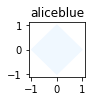

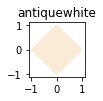

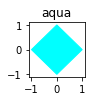

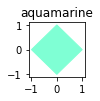

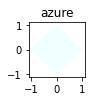

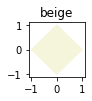

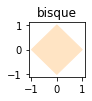

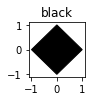

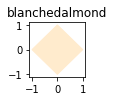

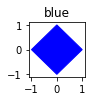

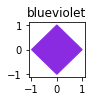

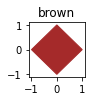

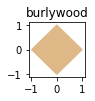

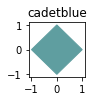

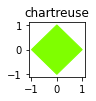

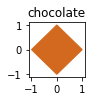

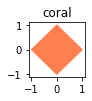

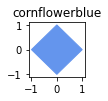

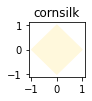

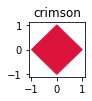

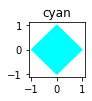

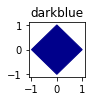

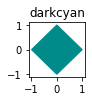

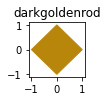

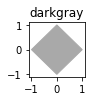

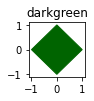

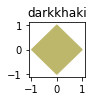

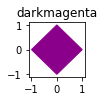

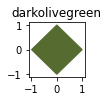

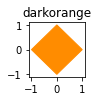

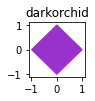

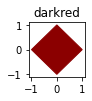

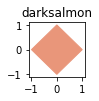

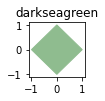

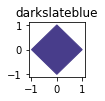

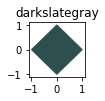

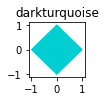

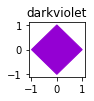

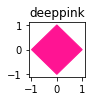

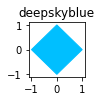

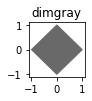

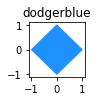

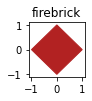

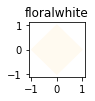

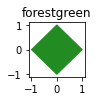

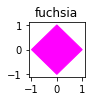

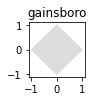

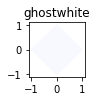

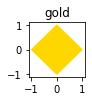

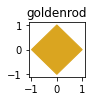

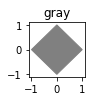

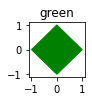

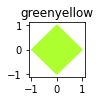

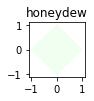

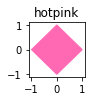

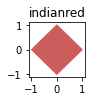

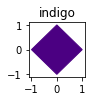

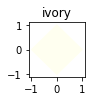

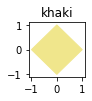

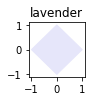

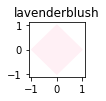

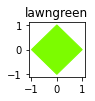

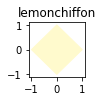

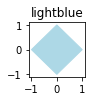

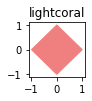

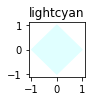

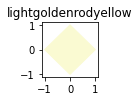

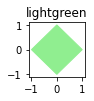

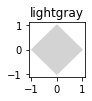

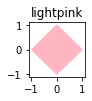

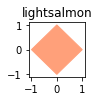

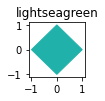

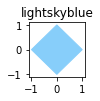

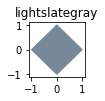

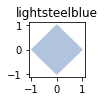

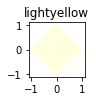

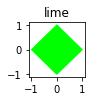

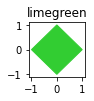

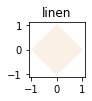

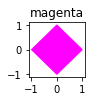

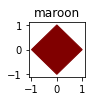

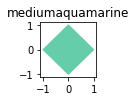

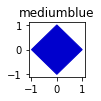

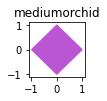

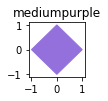

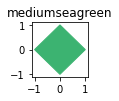

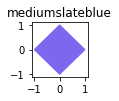

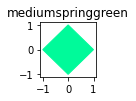

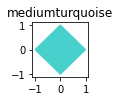

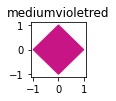

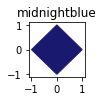

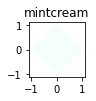

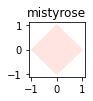

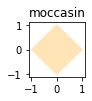

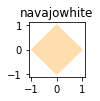

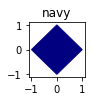

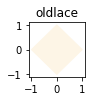

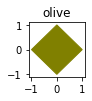

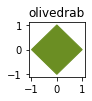

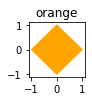

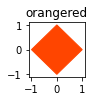

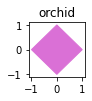

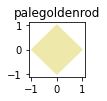

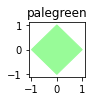

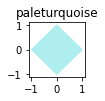

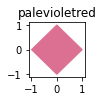

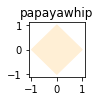

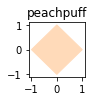

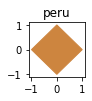

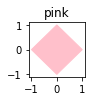

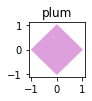

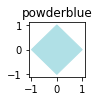

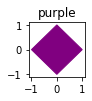

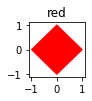

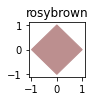

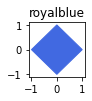

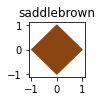

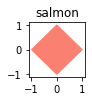

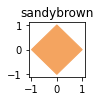

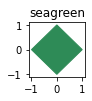

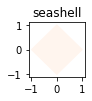

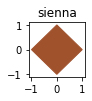

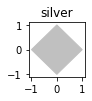

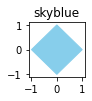

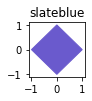

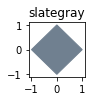

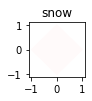

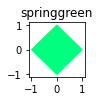

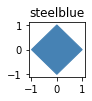

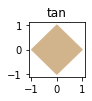

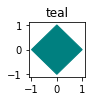

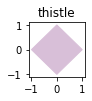

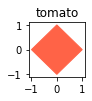

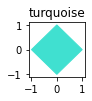

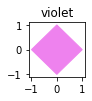

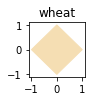

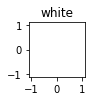

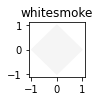

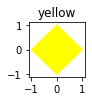

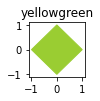

In [7]:
# Colours.
X_gt = [-1, 0, 1, 0]
Y_gt = [0, 1, 0, -1]
for c, v in cnames.items():
    plt.figure(figsize=(1,1))
    plt.fill(X_gt, Y_gt, color=c)#, alpha=0.5)
    plt.title(c)
    plt.show()

In [8]:
colours_categories = {'Complexity': "brown", 'Faithfulness': "blue", 'Localisation': "orange", 'Randomisation': "green", 'Robustness': "red"}
colours = {'Sparseness': "#411900", 
 'Complexity': "#7f4e1e",
 'Faithfulness Correlation': "#00555a",
 'Pixel-Flipping': "cadetblue",
 'Pointing-Game': "chocolate",
 'Relevance Mass Accuracy': "peru",
 'Random Logit': "darkolivegreen",
 'Model Parameter Randomisation Test': "darkseagreen",
 'Max-Sensitivity': "darkred",
 'Local Lipschitz Estimate': "indianred",}
 
plt.style.use(['seaborn-white'])

## Analyse hp results

In [9]:
# Get hp data.
path = Path(path_results+"hp/")    
[str(f.stem) for f in list(path.iterdir())]

['01122022_hp_tuning_exercise_f6bc',
 '01122022_hp_tuning_exercise_8b24',
 '01122022_hp_tuning_exercise_8b00',
 '02122022_hp_tuning_exercise_09ad',
 '02122022_hp_tuning_exercise_e884']

In [10]:
# Result MNSIT.
#result_hp = {'Test': ['MPT', 'MPT', 'MPT', 'MPT', 'MPT', 'MPT', 'MPT', 'MPT', 'MPT', 'MPT', 'MPT', 'MPT'], 'MC Mean': [0.5944750266111257, 0.6113948031360169, 0.6158474412879695, 0.5979526857566656, 0.619994782400155, 0.6146328481323311, 0.5962773256488019, 0.5427608553785862, 0.5525629574309472, 0.6195483609991637, 0.6018573789474742, 0.5733207951338495], 'MC Std': [0.014152682712831877, 0.012257593331852834, 0.009596690537797381, 0.005341825454632132, 0.0038938414248706477, 0.012218730779052223, 0.012281416258372813, 0.012179118009654544, 0.011795696195353145, 0.012447819180385455, 0.010293211879690178, 0.015208321961645899], 'Baseline Strategy': ['Black', 'Black', 'Black', 'Black', 'Uniform', 'Uniform', 'Uniform', 'Uniform', 'Mean', 'Mean', 'Mean', 'Mean'], 'Subset Size': [28, 52, 102, 128, 28, 52, 102, 128, 28, 52, 102, 128], 'IAC_{NR} mean': [0.48723744061197516, 0.5354164317137856, 0.5626048398253881, 0.5193373068457012, 0.5599899724111659, 0.6004828186750724, 0.49489572766954, 0.32357237044931225, 0.3110645044615371, 0.5683860794463371, 0.5136019593034635, 0.40080206576187205], 'IAC_{NR} std': [0.05050328902605908, 0.04868147792398517, 0.03928051144551925, 0.022556998731233985, 0.012293741706152495, 0.026256955165493423, 0.052530143029203835, 0.028289100568665904, 0.05850510909278442, 0.05024067126585602, 0.04071968514534746, 0.05872278227228589], 'IAC_{AR} mean': [0.9874980144263633, 0.9999437864218983, 0.9974277808027102, 0.9840933879493103, 0.9973625233239835, 0.973565432423579, 0.9998652681102609, 0.9709221361233173, 0.994187487703937, 0.9998100428143228, 0.9994137600425561, 0.9978894366626452], 'IAC_{AR} std': [0.05050328902605908, 0.04868147792398517, 0.03928051144551925, 0.022556998731233985, 0.012293741706152495, 0.026256955165493423, 0.052530143029203835, 0.028289100568665904, 0.05850510909278442, 0.05024067126585602, 0.04071968514534746, 0.05872278227228589], 'IEC_{NR} mean': [0.2624755859375, 0.2632568359375, 0.2637939453125, 0.2627685546875, 0.26865234375, 0.2598876953125, 0.2584228515625, 0.2571044921875, 0.26484375, 0.2645263671875, 0.26423339843750004, 0.2594482421875], 'IEC_{NR} std': [0.0048583984374999944, 0.002026367187499989, 0.003735351562499989, 0.0006103515625, 0.0019042968750000167, 0.005151367187499978, 0.003979492187499989, 0.0024169921874999944, 0.006152343750000011, 0.0014892578124999778, 0.0034423828125000056, 0.0008056640624999889], 'IEC_{AR} mean': [0.6406890654686646, 0.6469621584708836, 0.6395631992112796, 0.6256114935441508, 0.6539742901154708, 0.6245954461181731, 0.6319254552529066, 0.6194444227542153, 0.640156087558315, 0.6454709545484947, 0.6301803980063769, 0.6351434359233807], 'IEC_{AR} std': [0.003030087209693333, 0.002324180025237099, 0.0037990909690557295, 0.004308585873819382, 0.0027933849907574304, 0.0011919612416885217, 0.0005903214500727616, 0.006309573351051645, 0.002141631864087057, 0.000987059873667151, 0.00280630272473803, 0.0009537395527507431]}

# Result ImageNet.
df_result = pd.read_csv(path_results+"hp/"+"02122022_hp_tuning_exercise_e884.csv")

In [11]:
#df_result = pd.DataFrame.from_dict(result_hp)
df_result["Setting"] = np.arange(1, len(df_result)+1)
df_result.head()

,Unnamed: 0,Test,MC Mean,MC Std,Baseline Strategy,Subset Size,IAC_{NR} mean,IAC_{NR} std,IAC_{AR} mean,IAC_{AR} std,IEC_{NR} mean,IEC_{NR} std,IEC_{AR} mean,IEC_{AR} std,Setting
0,0,MPT,0.484862,0.016631,Black,28,0.476953,0.016878,0.719994,0.016878,0.268889,0.000556,0.473611,0.006389,1
1,1,MPT,0.502864,0.033075,Black,52,0.615000,0.118897,0.657416,0.118897,0.253333,0.016111,0.485709,0.000958,2
2,2,MPT,0.507748,0.007712,Black,102,0.441871,0.005466,0.830232,0.005466,0.258056,0.005833,0.500833,0.004722,3
3,3,MPT,0.534052,0.016083,Black,128,0.529893,0.030154,0.820168,0.030154,0.257537,0.004685,0.528611,0.018056,4
4,4,MPT,0.467436,0.001580,Uniform,28,0.474480,0.058386,0.640991,0.058386,0.268719,0.018194,0.485556,0.003333,5


In [12]:
df_result.describe()

,Unnamed: 0,MC Mean,MC Std,Subset Size,IAC_{NR} mean,IAC_{NR} std,IAC_{AR} mean,IAC_{AR} std,IEC_{NR} mean,IEC_{NR} std,IEC_{AR} mean,IEC_{AR} std,Setting
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,5.500000,0.498221,0.010993,77.500000,0.510865,0.037618,0.723604,0.037618,0.261827,0.011026,0.496587,0.006747,6.500000
std,3.605551,0.020752,0.008855,41.289444,0.066629,0.032519,0.081049,0.032519,0.008581,0.007615,0.020015,0.005214,3.605551
min,0.000000,0.467436,0.001580,28.000000,0.382833,0.001358,0.631131,0.001358,0.251378,0.000556,0.466111,0.000958,1.000000
25%,2.750000,0.487434,0.005112,46.000000,0.472153,0.015784,0.644335,0.015784,0.256039,0.005192,0.482569,0.003125,3.750000
50%,5.500000,0.492802,0.008879,77.000000,0.513319,0.032903,0.718389,0.032903,0.259808,0.009169,0.499583,0.005694,6.500000
75%,8.250000,0.504085,0.016220,108.500000,0.566199,0.054619,0.808828,0.054619,0.268762,0.017335,0.510903,0.007708,9.250000
max,11.000000,0.540099,0.033075,128.000000,0.615000,0.118897,0.830232,0.118897,0.276437,0.022023,0.528611,0.018056,12.000000


In [13]:
df_result.loc[df_result["MC Mean"].argmax()]

Unnamed: 0                 10
Test                      MPT
MC Mean              0.540099
MC Std               0.007526
Baseline Strategy        Mean
Subset Size               102
IAC_{NR} mean        0.563655
IAC_{NR} std         0.035652
IAC_{AR} mean        0.826751
IAC_{AR} std         0.035652
IEC_{NR} mean        0.251378
IEC_{NR} std         0.003048
IEC_{AR} mean        0.518611
IEC_{AR} std           0.0075
Setting                    11
Name: 10, dtype: object

In [14]:
settings = np.arange(len(df_result))
mc_scores = df_result['MC Mean'].values
mc_scores_std = df_result['MC Std'].values
iac_nr = df_result['IAC_{NR} mean'].values
iac_ar = df_result['IAC_{AR} mean'].values
iec_nr = df_result['IEC_{NR} mean'].values
iec_ar = df_result['IEC_{AR} mean'].values

(0.0, 2.8)

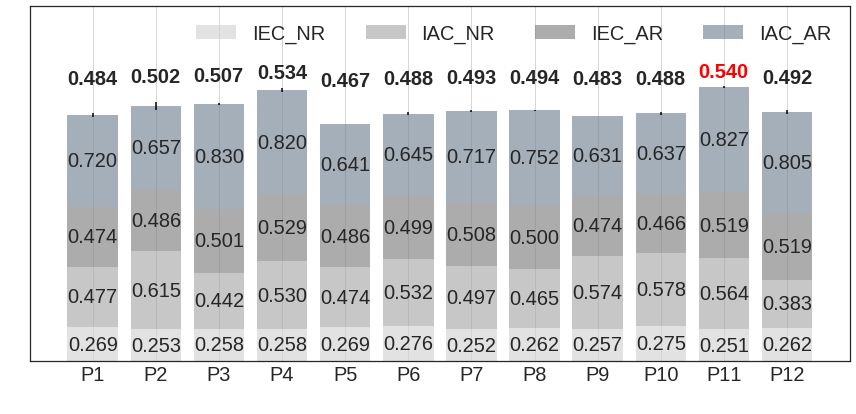

In [15]:
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
hatches = ['//', '\\\\', '||', '--', '++', 'xx', 'oo', 'OO', '..', '**'] 
hatches = ['/o', '\\|', '|*', '-\\', '+o', 'x*', 'o-', 'O|', 'O.', '*-']

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
barlist1=ax.bar(settings, iec_nr, alpha=0.65, color='lightgray', label="IEC_NR") ##aaa662
barlist2=ax.bar(settings, iac_nr, alpha=0.65,  bottom=iec_nr,  color='darkgray', label="IAC_NR") ##719f91
barlist3=ax.bar(settings, iec_ar, alpha=0.65, bottom=(iac_nr+iec_nr),  color='gray',  label="IEC_AR") ##c87f89
barlist4=ax.bar(settings, iac_ar, alpha=0.65, bottom=(iec_ar+iac_nr+iec_nr), yerr=mc_scores_std, color='#738595', label="IAC_AR", hatch="") #738595#afa88b

#plt.plot(2+mc_scores, "-o", c="black")

for i in settings:
    if mc_scores[i] == mc_scores.max():
        plt.annotate(xy=(i-0.4, 1.7+mc_scores[i]), text=f"{(str(mc_scores[i]))[:5]}", fontsize=20, c="red", weight='bold')
    else:
        plt.annotate(xy=(i-0.4, 1.7+mc_scores[i]), text=f"{(str(mc_scores[i]))[:5]}", fontsize=20, weight='bold')

ax.bar_label(barlist1, fmt='%.3f', label_type='center', fontsize=20)
ax.bar_label(barlist2, fmt='%.3f', label_type='center', fontsize=20)
ax.bar_label(barlist3, fmt='%.3f', label_type='center', fontsize=20)
ax.bar_label(barlist4, fmt='%.3f', label_type='center', fontsize=20)

ax.set_yticks([])
ax.set_xticks(ticks=np.arange(0, len(df_result)), labels=[f"P{i+1}" for i in range(len(df_result))], fontsize=20)
ax.legend(ncol=4, fontsize=20) # loc=2,
ax.grid()
plt.xlabel(" ", fontsize=20)
plt.ylabel(" ", fontsize=20)
plt.tight_layout()
plt.ylim(0, 2.8)

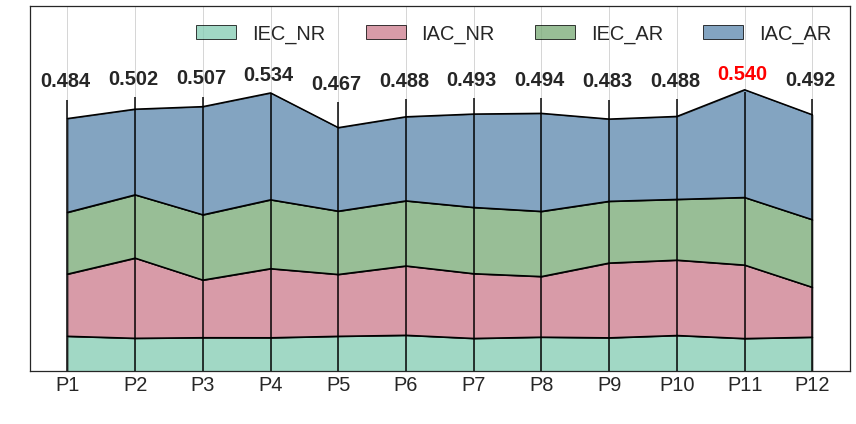

In [16]:
totals = (iec_nr+iac_nr+iec_ar+iac_ar)
y1 = (iec_nr)
y2 = (iec_nr+iac_nr)
y3 = (iec_nr+iac_nr+iec_ar)
y4 = (iec_nr+iac_nr+iec_ar+iac_ar)

c1 = "#82cbb2"
c2 = "#cc7a8b"
c3 = "#76a973"
c4 = "#5a86ad"

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(settings, y1, color="black")
plt.plot(settings, y2, color="black")
plt.plot(settings, y3, color="black")
plt.plot(settings, y4, color="black")

plt.fill_between(settings, y1,0, color=c1, alpha=0.75, label="IEC_NR", edgecolor="black")
plt.fill_between(settings, y1, y2, color=c2, alpha=0.75, label="IAC_NR", edgecolor="black")
plt.fill_between(settings, y2, y3, color=c3, alpha=0.75, label="IEC_AR", edgecolor="black")
plt.fill_between(settings, y3, y4, color=c4, alpha=0.75, label="IAC_AR", edgecolor="black")

for i in settings:
    if mc_scores[i] == mc_scores.max():
        plt.annotate(xy=(i-0.4, 1.7+mc_scores[i]), text=f"{(str(mc_scores[i]))[:5]}", fontsize=20, c="red", weight='bold')
    else:
        plt.annotate(xy=(i-0.4, 1.7+mc_scores[i]), text=f"{(str(mc_scores[i]))[:5]}", fontsize=20, weight='bold')

    plt.vlines(x=i, ymin=0, ymax=1.6+mc_scores[i], color="black")
               
plt.yticks([])
plt.legend(ncol=4, fontsize=20) 
plt.xticks(ticks=np.arange(0, len(df_result)), labels=[f"P{i+1}" for i in range(len(df_result))], fontsize=20)
plt.grid()
plt.xlabel(" ", fontsize=20)
plt.ylabel(" ", fontsize=20)
plt.ylim(0, 2.8)
plt.tight_layout()

## Analyse benchmarking data

In [17]:
# Get benchmarking data.
path = Path(path_results+"benchmarks/")    
sorted([str(f.stem) for f in list(path.iterdir()) if "benchmark_exercise" in str(f.stem)])

['01122022_MNIST_benchmark_exercise_9fdd',
 '01122022_cMNIST_benchmark_exercise_cdac',
 '01122022_fMNIST_benchmark_exercise_211e',
 '06122022_MNIST_benchmark_exercise_5314_bm',
 '06122022_cMNIST_benchmark_exercise_e72a_bm',
 '06122022_fMNIST_benchmark_exercise_25c1_bm',
 '07122022_MNIST_benchmark_exercise_09d5_Gradient_Saliency_IntegratedGradients_GradientShap_InputXGradient',
 '07122022_MNIST_benchmark_exercise_0db1_Gradient_Saliency',
 '07122022_MNIST_benchmark_exercise_0e6d_Gradient_Saliency_IntegratedGradients_GradientShap_InputXGradient_GradCAM',
 '07122022_MNIST_benchmark_exercise_176c_Gradient_Saliency_IntegratedGradients_GradientShap',
 '07122022_MNIST_benchmark_exercise_1df0_Gradient_Saliency',
 '07122022_MNIST_benchmark_exercise_48e5_Gradient_Occlusion',
 '07122022_MNIST_benchmark_exercise_59f1_Gradient_InputXGradient',
 '07122022_MNIST_benchmark_exercise_6b45_Gradient_Saliency_IntegratedGradients',
 '07122022_MNIST_benchmark_exercise_6f68_Gradient_Saliency_IntegratedGradient

In [19]:
# Load an object.
dataset_name = "MNIST"
benchmark_mnist = load_obj(path_results+"benchmarks/", fname=f"14122022_{dataset_name}_benchmark_exercise_8757_f", use_json=True)[dataset_name]["LeNet"]

dataset_name = "fMNIST"
benchmark_fmnist = load_obj(path_results+"benchmarks/", fname=f"14122022_{dataset_name}_benchmark_exercise_460d_f", use_json=True)[dataset_name]["LeNet"]

dataset_name = "cMNIST"
benchmark_cmnist = load_obj(path_results+"benchmarks/", fname=f"14122022_{dataset_name}_benchmark_exercise_ef2c_f", use_json=True)[dataset_name]["ResNet9"]

### Create tables

In [ ]:
#df_inter_averages[df_inter_averages.reset_index().index % 2 == 0][analyser_suite].style.background_gradient(axis=None) 

In [20]:
benchmark = benchmark_mnist 
estimator_category = "Complexity"
estimator_name = "Sparseness"
perturbation_type = "Model"
benchmark[estimator_category][estimator_name].keys()

dict_keys(['results_intra_scores', 'results_inter_scores', 'results_eval_scores', 'results_eval_scores_perturbed', 'results_indices_perturbed', 'results_meta_consistency_scores', 'results_consistency_scores'])

In [21]:
benchmark[estimator_category][estimator_name]["results_meta_consistency_scores"][perturbation_type]

{'consistency_scores': {'IAC_{NR}': [0.1810407345374781,
   0.22237712636133858,
   0.22411554200217576],
  'IAC_{AR}': [0.8883650626737288, 0.959337484954501, 0.9911226082834819],
  'IEC_{NR}': [0.8365885416666666, 0.8357421875, 0.8382161458333333],
  'IEC_{AR}': [0.5369748581776485, 0.577344579843096, 0.5919424115470073]},
 'consistency_results': {'IAC_{NR} mean': 0.20917780096699748,
  'IAC_{NR} std': 0.0199085643661125,
  'IAC_{AR} mean': 0.9462750519705706,
  'IAC_{AR} std': 0.0199085643661125,
  'IEC_{NR} mean': 0.8368489583333334,
  'IEC_{NR} std': 0.0010266385566419021,
  'IEC_{AR} mean': 0.5687539498559172,
  'IEC_{AR} std': 0.023248041832030924},
 'MC_means': [0.6107422992638805, 0.6487003446647338, 0.6613491769164996],
 'MC_mean': 0.6402639402817047,
 'MC_std': 0.02150416557510485}

In [22]:
benchmark[estimator_category][estimator_name]["results_meta_consistency_scores"]["Input"]

{'consistency_scores': {'IAC_{NR}': [0.9627991552731717,
   0.9372273278051642,
   0.8869845276199181],
  'IAC_{AR}': [0.04288004793984544, 0.05906433950641208, 0.056092342999535465],
  'IEC_{NR}': [0.8373046875, 0.8428385416666668, 0.8401041666666667],
  'IEC_{AR}': [0.0835166084849898, 0.08421749342085219, 0.0845970836061416]},
 'consistency_results': {'IAC_{NR} mean': 0.9290036702327513,
  'IAC_{NR} std': 0.03149270655725015,
  'IAC_{AR} mean': 0.052678910148597664,
  'IAC_{AR} std': 0.03149270655725015,
  'IEC_{NR} mean': 0.8400824652777779,
  'IEC_{NR} std': 0.0022592386176458943,
  'IEC_{AR} mean': 0.0841103951706612,
  'IEC_{AR} std': 0.0004475556935566608},
 'MC_means': [0.4816251247995017, 0.4808369255997738, 0.4669445302230655],
 'MC_mean': 0.476468860207447,
 'MC_std': 0.006742401191126426}

In [23]:
benchmark[estimator_category][estimator_name]["results_meta_consistency_scores"][perturbation_type]["consistency_scores"].keys()

dict_keys(['IAC_{NR}', 'IAC_{AR}', 'IEC_{NR}', 'IEC_{AR}'])

In [24]:
def make_benchmarking_df(benchmark: dict,
                         estimators: dict):
    df = pd.DataFrame(columns=["Category", "Estimator", "Test", "IAC_{NR}", "IAC_{AR}", "IEC_{NR}", "IEC_{AR}", "MC"])
    scores = ["IAC_{NR}", "IAC_{AR}", "IEC_{NR}", "IEC_{AR}"]

    means_all = []
    stds_all = []
    row= 0
    for ex1, (estimator_category, metrics) in enumerate(estimators.items()):
        for ex2, estimator_name in enumerate(metrics):
            for px, perturbation_type in enumerate(["Model", "Input"]):
                
                means = []
                stds = []

                row += ex1+ex2+px
                df.loc[row, "Test"] = perturbation_type
                df.loc[row, "Category"] = estimator_category
                df.loc[row, "Estimator"] = estimator_name
                for s in scores:
                    score = np.array(benchmark[estimator_category][estimator_name]["results_meta_consistency_scores"][perturbation_type]["consistency_scores"][s])
                    df.loc[row, s] = f"{score.mean():.3f}"+" $\pm$ "+f"{score.std():.3f}"
                    means.append(score.mean())
                    stds.append(score.std())

                mc_mean = benchmark[estimator_category][estimator_name]["results_meta_consistency_scores"][perturbation_type]["MC_mean"]
                mc_std = benchmark[estimator_category][estimator_name]["results_meta_consistency_scores"][perturbation_type]["MC_std"]
                df.loc[row, "MC"] = f"{mc_mean:.3f}"+" $\pm$ "+f"{mc_std:.3f}"

                means.append(mc_mean)
                stds.append(mc_std)

                means_all.append(means)
                stds_all.append(stds)

    means_all = np.array(means_all)
    stds_all = np.array(stds_all)

    return df

In [25]:
df_mnist = make_benchmarking_df(benchmark=benchmark_mnist, estimators=estimators)
df_mnist

,Category,Estimator,Test,IAC_{NR},IAC_{AR},IEC_{NR},IEC_{AR},MC
0,Complexity,Sparseness,Model,0.209 $\pm$ 0.020,0.946 $\pm$ 0.043,0.837 $\pm$ 0.001,0.569 $\pm$ 0.023,0.640 $\pm$ 0.022
1,Complexity,Sparseness,Input,0.929 $\pm$ 0.031,0.053 $\pm$ 0.007,0.840 $\pm$ 0.002,0.084 $\pm$ 0.000,0.476 $\pm$ 0.007
2,Complexity,Complexity,Model,0.009 $\pm$ 0.006,1.000 $\pm$ 0.000,1.000 $\pm$ 0.000,0.156 $\pm$ 0.007,0.541 $\pm$ 0.003
4,Complexity,Complexity,Input,0.167 $\pm$ 0.000,0.833 $\pm$ 0.000,1.000 $\pm$ 0.000,0.000 $\pm$ 0.000,0.500 $\pm$ 0.000
5,Faithfulness,Faithfulness Correlation,Model,0.477 $\pm$ 0.016,0.900 $\pm$ 0.011,0.190 $\pm$ 0.002,0.579 $\pm$ 0.004,0.537 $\pm$ 0.001
7,Faithfulness,Faithfulness Correlation,Input,0.500 $\pm$ 0.053,0.890 $\pm$ 0.002,0.190 $\pm$ 0.001,0.594 $\pm$ 0.002,0.543 $\pm$ 0.013
9,Faithfulness,Pixel-Flipping,Model,0.547 $\pm$ 0.069,0.963 $\pm$ 0.017,0.299 $\pm$ 0.001,0.626 $\pm$ 0.023,0.609 $\pm$ 0.020
12,Faithfulness,Pixel-Flipping,Input,0.485 $\pm$ 0.070,1.000 $\pm$ 0.000,0.294 $\pm$ 0.003,0.796 $\pm$ 0.003,0.644 $\pm$ 0.019
14,Localisation,Pointing-Game,Model,0.977 $\pm$ 0.002,0.607 $\pm$ 0.038,0.996 $\pm$ 0.000,0.108 $\pm$ 0.006,0.672 $\pm$ 0.010
17,Localisation,Pointing-Game,Input,1.000 $\pm$ 0.000,0.000 $\pm$ 0.000,1.000 $\pm$ 0.000,0.000 $\pm$ 0.000,0.500 $\pm$ 0.000


In [26]:
df_fmnist = make_benchmarking_df(benchmark=benchmark_fmnist, estimators=estimators)
df_fmnist

,Category,Estimator,Test,IAC_{NR},IAC_{AR},IEC_{NR},IEC_{AR},MC
0,Complexity,Sparseness,Model,0.145 $\pm$ 0.019,0.915 $\pm$ 0.022,0.831 $\pm$ 0.002,0.492 $\pm$ 0.041,0.596 $\pm$ 0.006
1,Complexity,Sparseness,Input,0.917 $\pm$ 0.018,0.070 $\pm$ 0.001,0.832 $\pm$ 0.002,0.083 $\pm$ 0.001,0.475 $\pm$ 0.005
2,Complexity,Complexity,Model,0.050 $\pm$ 0.023,0.990 $\pm$ 0.014,0.999 $\pm$ 0.000,0.086 $\pm$ 0.014,0.532 $\pm$ 0.007
4,Complexity,Complexity,Input,0.167 $\pm$ 0.000,0.833 $\pm$ 0.000,1.000 $\pm$ 0.000,0.000 $\pm$ 0.000,0.500 $\pm$ 0.000
5,Faithfulness,Faithfulness Correlation,Model,0.527 $\pm$ 0.015,0.857 $\pm$ 0.036,0.198 $\pm$ 0.004,0.515 $\pm$ 0.002,0.524 $\pm$ 0.011
7,Faithfulness,Faithfulness Correlation,Input,0.448 $\pm$ 0.043,0.994 $\pm$ 0.002,0.196 $\pm$ 0.002,0.504 $\pm$ 0.001,0.536 $\pm$ 0.011
9,Faithfulness,Pixel-Flipping,Model,0.447 $\pm$ 0.025,0.958 $\pm$ 0.044,0.329 $\pm$ 0.001,0.558 $\pm$ 0.016,0.573 $\pm$ 0.012
12,Faithfulness,Pixel-Flipping,Input,0.453 $\pm$ 0.037,1.000 $\pm$ 0.000,0.324 $\pm$ 0.000,0.817 $\pm$ 0.002,0.649 $\pm$ 0.009
14,Localisation,Pointing-Game,Model,0.950 $\pm$ 0.012,0.634 $\pm$ 0.016,0.995 $\pm$ 0.001,0.084 $\pm$ 0.009,0.666 $\pm$ 0.005
17,Localisation,Pointing-Game,Input,1.000 $\pm$ 0.000,0.000 $\pm$ 0.000,1.000 $\pm$ 0.000,0.000 $\pm$ 0.000,0.500 $\pm$ 0.000


In [27]:
df_cmnist = make_benchmarking_df(benchmark=benchmark_cmnist, estimators=estimators)
df_cmnist

,Category,Estimator,Test,IAC_{NR},IAC_{AR},IEC_{NR},IEC_{AR},MC
0,Complexity,Sparseness,Model,0.352 $\pm$ 0.030,0.989 $\pm$ 0.008,0.814 $\pm$ 0.001,0.670 $\pm$ 0.008,0.706 $\pm$ 0.006
1,Complexity,Sparseness,Input,0.626 $\pm$ 0.049,0.313 $\pm$ 0.014,0.830 $\pm$ 0.002,0.333 $\pm$ 0.003,0.525 $\pm$ 0.009
2,Complexity,Complexity,Model,0.056 $\pm$ 0.042,1.000 $\pm$ 0.000,0.996 $\pm$ 0.000,0.209 $\pm$ 0.006,0.565 $\pm$ 0.012
4,Complexity,Complexity,Input,0.062 $\pm$ 0.005,0.928 $\pm$ 0.024,1.000 $\pm$ 0.000,0.080 $\pm$ 0.002,0.518 $\pm$ 0.006
5,Faithfulness,Faithfulness Correlation,Model,0.508 $\pm$ 0.030,0.939 $\pm$ 0.009,0.182 $\pm$ 0.002,0.622 $\pm$ 0.002,0.563 $\pm$ 0.009
7,Faithfulness,Faithfulness Correlation,Input,0.490 $\pm$ 0.015,0.934 $\pm$ 0.009,0.188 $\pm$ 0.004,0.634 $\pm$ 0.006,0.562 $\pm$ 0.005
9,Faithfulness,Pixel-Flipping,Model,0.565 $\pm$ 0.020,0.965 $\pm$ 0.011,0.287 $\pm$ 0.003,0.526 $\pm$ 0.040,0.586 $\pm$ 0.011
12,Faithfulness,Pixel-Flipping,Input,0.495 $\pm$ 0.019,0.995 $\pm$ 0.001,0.295 $\pm$ 0.006,0.701 $\pm$ 0.001,0.621 $\pm$ 0.005
14,Localisation,Pointing-Game,Model,0.967 $\pm$ 0.000,1.000 $\pm$ 0.000,0.997 $\pm$ 0.000,0.527 $\pm$ 0.020,0.873 $\pm$ 0.005
17,Localisation,Pointing-Game,Input,0.995 $\pm$ 0.002,0.013 $\pm$ 0.002,0.999 $\pm$ 0.000,0.001 $\pm$ 0.000,0.502 $\pm$ 0.001


In [28]:
df_mnist.iloc[:, 3:].to_latex(multirow=True)

'\\begin{tabular}{llllll}\n\\toprule\n{} &           IAC\\_\\{NR\\} &           IAC\\_\\{AR\\} &           IEC\\_\\{NR\\} &           IEC\\_\\{AR\\} &                 MC \\\\\n\\midrule\n0  &  0.209 \\$\\textbackslash pm\\$ 0.020 &  0.946 \\$\\textbackslash pm\\$ 0.043 &  0.837 \\$\\textbackslash pm\\$ 0.001 &  0.569 \\$\\textbackslash pm\\$ 0.023 &  0.640 \\$\\textbackslash pm\\$ 0.022 \\\\\n1  &  0.929 \\$\\textbackslash pm\\$ 0.031 &  0.053 \\$\\textbackslash pm\\$ 0.007 &  0.840 \\$\\textbackslash pm\\$ 0.002 &  0.084 \\$\\textbackslash pm\\$ 0.000 &  0.476 \\$\\textbackslash pm\\$ 0.007 \\\\\n2  &  0.009 \\$\\textbackslash pm\\$ 0.006 &  1.000 \\$\\textbackslash pm\\$ 0.000 &  1.000 \\$\\textbackslash pm\\$ 0.000 &  0.156 \\$\\textbackslash pm\\$ 0.007 &  0.541 \\$\\textbackslash pm\\$ 0.003 \\\\\n4  &  0.167 \\$\\textbackslash pm\\$ 0.000 &  0.833 \\$\\textbackslash pm\\$ 0.000 &  1.000 \\$\\textbackslash pm\\$ 0.000 &  0.000 \\$\\textbackslash pm\\$ 0.000 &  0.500 \\$\\textbacks

### Create scatter plots

In [29]:
def make_scatter_df(benchmark: dict,
                    estimators: dict):
    df = pd.DataFrame(columns=["Category", "Estimator", "Test", "IAC_{NR}", "IAC_{AR}", "IEC_{NR}", "IEC_{AR}", "MC", "IAC_{NR} std", "IAC_{AR} std", "IEC_{NR} std", "IEC_{AR} std", "MC std"])
    scores = ["IAC_{NR}", "IAC_{AR}", "IEC_{NR}", "IEC_{AR}"]

    row= 0
    for ex1, (estimator_category, metrics) in enumerate(estimators.items()):
        for ex2, estimator_name in enumerate(metrics):
            for px, perturbation_type in enumerate(["Model", "Input"]):

                row += ex1+ex2+px
                df.loc[row, "Test"] = perturbation_type
                df.loc[row, "Category"] = estimator_category
                df.loc[row, "Estimator"] = estimator_name
                for s in scores:
                    score = np.array(benchmark[estimator_category][estimator_name]["results_meta_consistency_scores"][perturbation_type]["consistency_scores"][s])
                    df.loc[row, s] = score.mean()
                    df.loc[row, s+" std"] = score.std()

                df.loc[row, "MC"] = benchmark[estimator_category][estimator_name]["results_meta_consistency_scores"][perturbation_type]["MC_mean"]
                df.loc[row, "MC std"] = benchmark[estimator_category][estimator_name]["results_meta_consistency_scores"][perturbation_type]["MC_std"]

    return df

In [30]:
df_mnist = make_scatter_df(benchmark=benchmark_mnist, estimators=estimators)
df_fmnist = make_scatter_df(benchmark=benchmark_fmnist, estimators=estimators)
df_cmnist = make_scatter_df(benchmark=benchmark_cmnist, estimators=estimators)

In [31]:
df_mnist[["IAC_{NR}","IAC_{AR}","IEC_{NR}","IEC_{AR}","MC","IAC_{NR} std","IAC_{AR} std","IEC_{NR} std","IEC_{AR} std","MC std"]] = df_mnist[["IAC_{NR}","IAC_{AR}","IEC_{NR}","IEC_{AR}","MC","IAC_{NR} std","IAC_{AR} std","IEC_{NR} std","IEC_{AR} std","MC std"]].astype(float)

In [32]:
df_mnist.describe()

,IAC_{NR},IAC_{AR},IEC_{NR},IEC_{AR},MC,IAC_{NR} std,IAC_{AR} std,IEC_{NR} std,IEC_{AR} std,MC std
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.000000,20.000000,20.000000
mean,0.473490,0.775584,0.734417,0.425288,0.602195,0.026756,1.135073e-02,0.001113,0.006455,0.007904
std,0.289992,0.330007,0.270863,0.290991,0.088950,0.022808,1.427947e-02,0.000917,0.008121,0.007144
min,0.008929,0.000000,0.189920,0.000000,0.476469,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.256070,0.803088,0.714160,0.101779,0.540023,0.008670,8.326673e-17,0.000403,0.000416,0.002178
50%,0.480624,0.917631,0.821463,0.557211,0.610546,0.023449,7.654341e-03,0.001009,0.002923,0.005619
75%,0.546908,0.964309,0.910878,0.602041,0.650647,0.035659,1.449913e-02,0.001599,0.009318,0.013138
max,1.000000,1.000000,1.000000,0.795752,0.755510,0.070343,4.387375e-02,0.003126,0.023248,0.021504


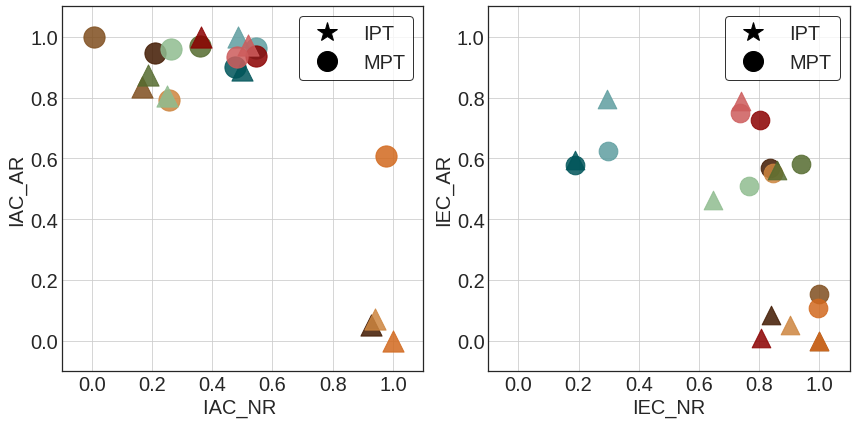

In [33]:
import matplotlib.lines as mlines

df = df_mnist

legend_elements = [mlines.Line2D([], [], color='black', marker='*', linestyle='None', markersize=20, label='IPT'), 
                   mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=20, label='MPT')]
markers = {"Input": "^", "Model": "o"} # ['s', '*', '^']


fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for x, y, col, t in zip(df["IAC_{NR}"].values, df["IAC_{AR}"].values, df["Estimator"].values, df["Test"].values):
    ax[0].scatter(x=x, y=y, marker=markers[t], c=colours[col], s=450, label=t, alpha=0.85)

for x, y, col, t in zip(df["IEC_{NR}"].values, df["IEC_{AR}"].values, df["Estimator"].values, df["Test"].values):
    ax[1].scatter(x=x, y=y, marker=markers[t], c=colours[col], s=350, label=t, alpha=0.85)

ax[0].legend(handles=legend_elements,  fontsize=20, frameon=True, edgecolor="black")
ax[0].set_ylabel("IAC_AR", fontsize=20)
ax[0].set_xlabel("IAC_NR ", fontsize=20)
ax[0].set_ylim(-0.1, 1.1)
ax[0].set_xlim(-0.1, 1.1)
ax[0].set_yticks(ticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=20)
ax[0].set_xticks(ticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=20)
ax[0].grid()

ax[1].legend(handles=legend_elements,  fontsize=20, frameon=True, edgecolor="black")
ax[1].set_ylabel("IEC_AR", fontsize=20)
ax[1].set_xlabel("IEC_NR", fontsize=20)
ax[1].set_ylim(-0.1, 1.1)
ax[1].set_xlim(-0.1, 1.1)
ax[1].set_yticks(ticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=20)
ax[1].set_xticks(ticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=20)
ax[1].grid()
plt.tight_layout()

### Area graph single

In [34]:
from typing import Optional
from itertools import cycle
cycol = cycle('bgrcmk')

def plot_single_estimator_area(benchmark: dict,
                        estimator_category: str, 
                        estimator_name: str,
                        perturbation_type: str,
                        title: Optional[str] = "",
                        ):
    
    #try: 
    scores = {
        "IAC_NR" : np.array(benchmark[estimator_category][estimator_name]["results_consistency_scores"][perturbation_type]["intra_scores_res"]).flatten(),
        "IAC_AR" : np.array(benchmark[estimator_category][estimator_name]["results_consistency_scores"][perturbation_type]["intra_scores_adv"]).flatten(),
        "IEC_NR" : np.array(benchmark[estimator_category][estimator_name]["results_consistency_scores"][perturbation_type]["inter_scores_res"]).flatten(),
        "IEC_AR" : np.array(benchmark[estimator_category][estimator_name]["results_consistency_scores"][perturbation_type]["inter_scores_adv"]).flatten(),
    }

    mc_scores = [np.mean(scores["IAC_NR"]), np.mean(scores["IAC_AR"]), np.mean(scores["IEC_NR"]), np.mean(scores["IEC_AR"])]

    fig = plt.figure(figsize=(3, 3))
    ax = plt.axes()
    plt.grid()
    plt.title(f"{estimator_name} ({np.mean(mc_scores):.3f}) \n {perturbation_type} - {title}", fontsize=12)

    X_gt = [-1, 0, 1, 0]
    Y_gt = [0, 1, 0, -1]
    X_area = [-scores["IAC_AR"].mean(), 0, scores["IEC_AR"].mean(), 0]
    Y_area = [0, scores["IAC_NR"].mean(), 0, -scores["IEC_NR"].mean()]
        
    #print([IAC_AR.mean(), IEC_AR.mean(), IAC_NR.mean(), IEC_NR.mean()])
    plt.fill(X_gt, Y_gt, color="black", alpha=0.1)
    plt.fill(X_area, Y_area, color=next(cycol), alpha=0.8, edgecolor="black")

    # Annotate.
    plt.annotate("${IAC}_{AR}$"+f'={scores["IAC_AR"].mean():.2f}', (-scores["IAC_AR"].mean(), 0.1), fontsize=12)
    plt.annotate("${IAC}_{NR}$"+f'={scores["IAC_NR"].mean():.2f}', (-0.2, scores["IAC_NR"].mean()+0.05), fontsize=12)
    plt.annotate("${IEC}_{AR}$"+f'={scores["IEC_AR"].mean():.2f}', (scores["IEC_AR"].mean(), 0.1), fontsize=12)
    plt.annotate("${IEC}_{NR}$"+f'={scores["IEC_NR"].mean():.2f}', (-0.2, -scores["IEC_NR"].mean()-0.1), fontsize=12)
    
    # Labels.
    ax.set_xticklabels(["", "1", "", "0.5", "",  "0", "", "0.5", "", "1", ""], fontsize=15)
    ax.set_yticklabels(["", "1", "", "0.5", "",  "0", "", "0.5", "", "1", ""], fontsize=15)
    #if title:
    #print(f"{estimator_name} ({np.mean(list(scores.values()))}) \n {title}")
    
    
    #else:
    #    plt.title(f"{estimator_name}", fontsize=20)
    
    # Limits.
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.show()
    
    return fig, scores

    #except:
    #    pass #print(f"Could not find data to plot for estimator={estimator_name}.")

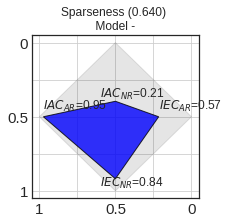

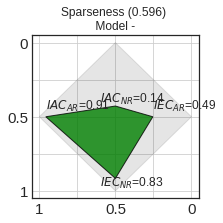

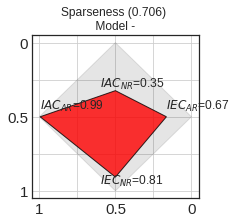

In [35]:
estimator_category = "Complexity"
estimator_name = "Sparseness" 
perturbation_type = "Model"

plot_single_estimator_area(benchmark_mnist, estimator_category, estimator_name, perturbation_type);
plot_single_estimator_area(benchmark_fmnist, estimator_category, estimator_name, perturbation_type);
plot_single_estimator_area(benchmark_cmnist, estimator_category, estimator_name, perturbation_type);

### Area graph full

In [36]:
def plot_multiple_estimator_area(benchmark: dict,
                                 estimators: dict,
                                 average_over: list = ["Model", "Input"],):
    
    fig, axs = plt.subplots(2, 5, sharex=True, figsize=(20, 8)) #sharex=True, sharey=True, 

    scores = []
    for ex1, (estimator_category, metrics) in enumerate(estimators.items()):
        for ex2, estimator_name in enumerate(metrics):
            for px, perturbation_type in enumerate(["Input", "Model"]):

                intra_scores_res = np.array(benchmark[estimator_category][estimator_name]["results_consistency_scores"][perturbation_type]["intra_scores_res"]).flatten()
                intra_scores_adv = np.array(benchmark[estimator_category][estimator_name]["results_consistency_scores"][perturbation_type]["intra_scores_adv"]).flatten()
                inter_scores_res = np.array(benchmark[estimator_category][estimator_name]["results_consistency_scores"][perturbation_type]["inter_scores_res"]).flatten()
                inter_scores_adv = np.array(benchmark[estimator_category][estimator_name]["results_consistency_scores"][perturbation_type]["inter_scores_adv"]).flatten()
                
                X_gt = [-1, 0, 1, 0]
                Y_gt = [0, 1, 0, -1]
                X_area = [-intra_scores_adv.mean(), 0, inter_scores_adv.mean(), 0]
                Y_area = [0, intra_scores_res.mean(), 0, -inter_scores_res.mean()]

                if perturbation_type in average_over: 
                    score = np.array([intra_scores_adv.mean(), inter_scores_adv.mean(), intra_scores_res.mean(), inter_scores_res.mean()])
                    scores.append(score) 

                if perturbation_type == "Input":
                    axs[ex2, ex1].fill(X_area, Y_area, color=colours[estimator_name], alpha=0.75, label=perturbation_type, edgecolor="black")
                else:
                    axs[ex2, ex1].fill(X_area, Y_area, color=colours[estimator_name], alpha=0.5, label=perturbation_type, hatch = '/', edgecolor="black")
                
                if px == 1:
                    axs[ex2, ex1].fill(X_gt, Y_gt, color="black", alpha=0.075, label="m*")

                # Annotate.
                #axs[ex2, ex1].annotate("${IAC}_{AR}$"+f"={intra_scores_adv.mean():.2f}", (-intra_scores_adv.mean(), 0.1), fontsize=12)
                #axs[ex2, ex1].annotate("${IAC}_{NR}$"+f"={intra_scores_res.mean():.2f}", (-0.2, intra_scores_res.mean()+0.05), fontsize=12)
                #axs[ex2, ex1].annotate("\n\n${IEC}_{AR}$"+f"={inter_scores_adv.mean():.2f}", (inter_scores_adv.mean(), 0.1), fontsize=12)
                #axs[ex2, ex1].annotate("${IEC}_{NR}$"+f"={inter_scores_res.mean():.2f}", (-0.2, -inter_scores_res.mean()-0.1), fontsize=12)
                
                axs[ex2, ex1].annotate("${IAC}_{AR}$", (-1, 0), fontsize=12)
                axs[ex2, ex1].annotate("${IAC}_{NR}$", (-0.2, 0.8), fontsize=12)
                axs[ex2, ex1].annotate("${IEC}_{AR}$", (0.7, 0), fontsize=12)
                axs[ex2, ex1].annotate("${IEC}_{NR}$", (-0.2, -0.8), fontsize=12)
            
            # Labels.
            axs[ex2, ex1].set_xticklabels(["", "1", "0.5",  "0", "0.5", "1"], fontsize=14)
            
            axs[ex2, ex1].set_yticklabels(["", "1", "", "0.5", "",  "0", "", "0.5", "", "1", ""], fontsize=14)
            if estimator_name == "Model Parameter Randomisation Test":
                estimator_name = "Model Parameter Random."
            axs[ex2, ex1].set_title(f"{estimator_name} ({np.array(scores).flatten().mean():.3f})", fontsize=14)
            axs[ex2, ex1].grid()
            axs[ex2, ex1].legend(loc="upper left")

            #axs[ex2, ex1].plot([0, 0], [-1, 1], '--bo', label='NR')
            #axs[ex2, ex1].plot([-1, 1], [0, 0], '--go', label='AR')

            # Limits.
            #axs[ex2, ex1].set_xlim(-1.6, 1.6)
            #axs[ex2, ex1].set_ylim(-1.6, 1.6)
            plt.grid()
                

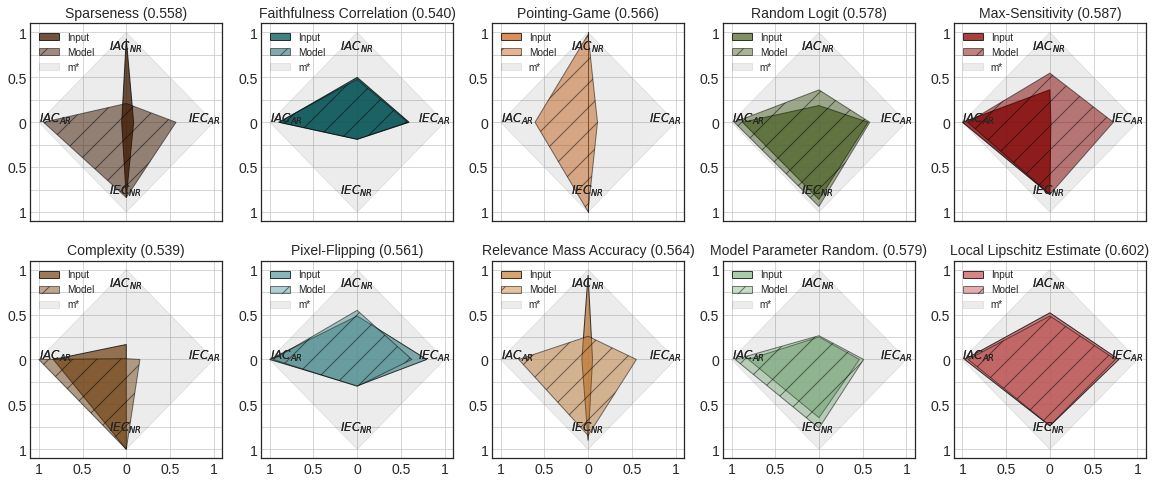

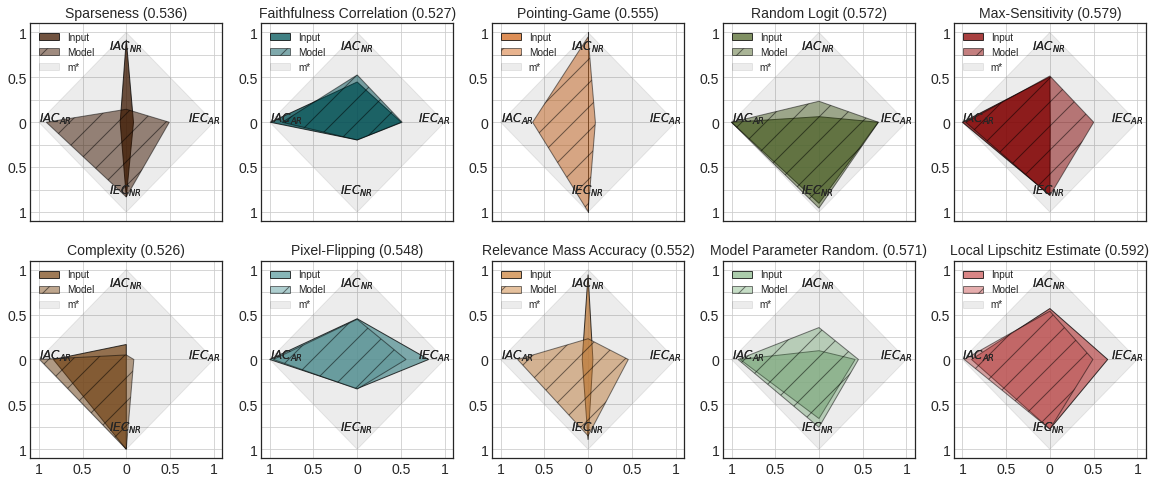

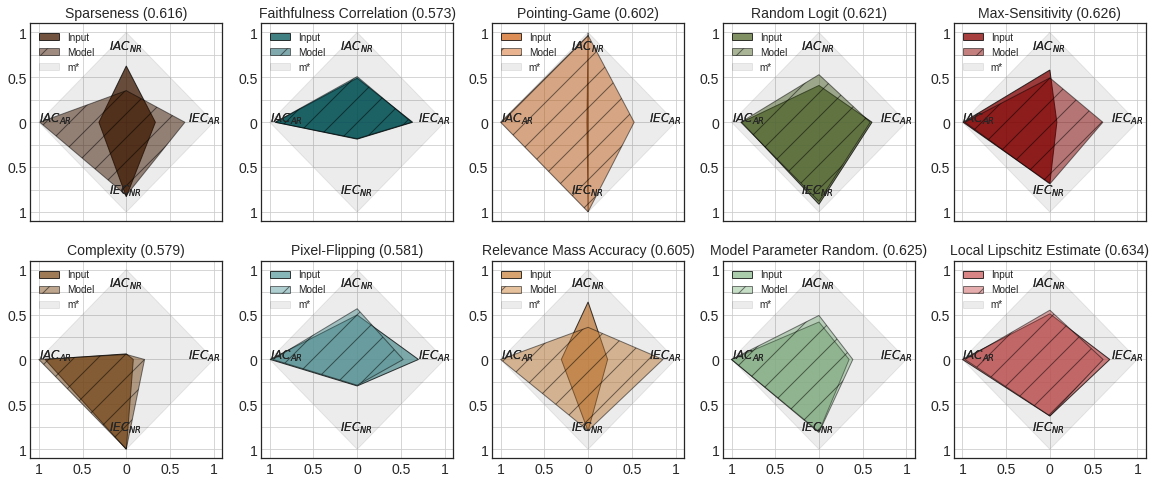

In [38]:
plot_multiple_estimator_area(benchmark=benchmark_mnist, estimators=estimators, average_over=["Model", "Input"]);
plot_multiple_estimator_area(benchmark=benchmark_fmnist, estimators=estimators, average_over=["Model", "Input"]);
plot_multiple_estimator_area(benchmark=benchmark_cmnist, estimators=estimators, average_over=["Model", "Input"]);

## Analyse L dependency

In [39]:
# Get benchmarking data.
path = Path(path_results+"l_dependency/")    
#dataset_name = "MNIST"
files = sorted([str(f.stem) for f in list(path.iterdir())])
# if "11122022" in str(f.stem) and "LD" in str(f.stem)
# and "_"+dataset_name in str(f.stem)])
files

['11122022_MNIST_benchmark_exercise_06a5_LD_3_GR_GC_GSLocalisation_Complexity_Randomisation',
 '11122022_MNIST_benchmark_exercise_4349_LD_2_GR_IGLocalisation_Complexity_Randomisation',
 '11122022_MNIST_benchmark_exercise_457b_LD_2_GR_IXLocalisation_Complexity_Randomisation',
 '11122022_MNIST_benchmark_exercise_4774_LD_3_GR_SA_IGLocalisation_Complexity_Randomisation',
 '11122022_MNIST_benchmark_exercise_53dc_LD_3_GR_SA_IGLocalisation_Complexity_Randomisation',
 '11122022_MNIST_benchmark_exercise_5aae_LD_4_GR_SA_IX_GCLocalisation_Complexity_Randomisation',
 '11122022_MNIST_benchmark_exercise_64d3_LD_2_GR_OCLocalisation_Complexity_Randomisation',
 '11122022_MNIST_benchmark_exercise_7b09_LD_4_GR_SA_OC_LRLocalisation_Complexity_Randomisation',
 '11122022_MNIST_benchmark_exercise_7e4f_LD_2_GR_SALocalisation_Complexity_Randomisation',
 '11122022_MNIST_benchmark_exercise_8a15_LD_4_GR_SA_IX_GCLocalisation_Complexity_Randomisation',
 '11122022_MNIST_benchmark_exercise_9486_2_GR_SA_Robustness_Fai

In [195]:
def fix_name(name: str):
    if "Localisation" in name:
        name = name.split("Localisation")[0] + "_Loc_Com_Ran"
    elif  "Robustness" in name:
        name = name.split("Robustness")[0] + "_Rob_Fai"
    if name.endswith("_"):
        name = name[:-1]
    return name

def load_source(files: list, dataset_name, model_name):
    
    print()
    print(dataset_name)
    print()
    
    benchmarks = {}
    for fname in files:
        if dataset_name in fname and ("15122022" in fname or "14122022" in fname):
            try:
                for i in ["_2_", "_3_", "_4_"]:
                    try:
                        name = i[1:] + fname.split(i)[1] #
                        name = fix_name(name=name)
                        if name not in benchmarks:
                            print(name)
                            benchmarks[name] = load_obj(path_results+"L_dependency/", fname=fname, use_json=True)[dataset_name][model_name]
                    except:
                        pass
                    
                #benchmarks[name] = load_obj(path_results+"L_dependency/", fname=fname, use_json=True)[dataset_name][model_name]
            except:
                pass #print(f"Could not load fname={fname}")

    return benchmarks

benchmarks_mnist = load_source(files=files, dataset_name="MNIST", model_name="LeNet")#, benchmarks=benchmarks)
benchmarks_fmnist = load_source(files=files, dataset_name="fMNIST", model_name="LeNet")#, benchmarks=benchmarks)
benchmarks_cmnist = load_source(files=files, dataset_name="cMNIST", model_name="ResNet9")#, benchmarks=benchmarks)
#benchmarks = load_source(dataset_name="ImageNet", model_name="ResNet18", benchmarks=benchmarks)
len(benchmarks_mnist), len(benchmarks_fmnist), len(benchmarks_cmnist)


MNIST

3_GR_GC_GS__Rob_Fai
4_GR_SA_IX_GC__Rob_Fai
4_GR_SA_OC_GC__Rob_Fai
2_GR_IG__Rob_Fai
2_GR_SA__Rob_Fai
3_GR_SA_IG__Rob_Fai
2_GR_OC__Rob_Fai
2_GR_IX__Rob_Fai

fMNIST

3_GR_GC_GS__Rob_Fai
4_GR_SA_OC_GC__Rob_Fai
4_GR_SA_IX_GC__Rob_Fai
2_GR_IX__Rob_Fai
3_GR_SA_IG__Rob_Fai
2_GR_OC__Rob_Fai
2_GR_SA__Rob_Fai
2_GR_IG__Rob_Fai

cMNIST



(8, 8, 0)

In [196]:
def get_scores(benchmark: dict, estimator_category: str, estimator_name: str, perturbation_type: str):
    try:
        scores = {
            "IAC_NR" : np.array(benchmark[estimator_category][estimator_name]["results_consistency_scores"][perturbation_type]["intra_scores_res"]).flatten(),
            "IAC_AR" : np.array(benchmark[estimator_category][estimator_name]["results_consistency_scores"][perturbation_type]["intra_scores_adv"]).flatten(),
            "IEC_NR" : np.array(benchmark[estimator_category][estimator_name]["results_consistency_scores"][perturbation_type]["inter_scores_res"]).flatten(),
            "IEC_AR" : np.array(benchmark[estimator_category][estimator_name]["results_consistency_scores"][perturbation_type]["inter_scores_adv"]).flatten(),
        }
        mc_scores = [np.mean(scores["IAC_NR"]), np.mean(scores["IAC_AR"]), np.mean(scores["IEC_NR"]), np.mean(scores["IEC_AR"])]
        #mc = np.mean(np.hstack(list(scores.values()))) #print(np.shape(values), values.size, values.ndim) #mc = np.mean(values)
        #print(np.hstack(list(scores.values())).size)
        #print(mc_scores)
        return scores, np.mean(mc_scores)
    except:

        raise KeyError(f"Could not find data for estimator={estimator_name}.")

def print_standard_deviations_per_benchmarks(dataset_name: str, benchmarks: dict, estimators: dict):

    print(dataset_name)
    print()
    mc_scores = {}
    for ex1, (estimator_category, metrics) in enumerate(estimators.items()):
        for ex2, estimator_name in enumerate(metrics):
            mc_scores[estimator_name] = {}
            for px, perturbation_type in enumerate(["Input", "Model"]):
                mc_scores[perturbation_type] = {}
                mcs = []
                all_scores = {"IAC_NR": list(), "IAC_AR": list(), "IEC_NR": list(), "IEC_AR": list(),}
                scores = {}
                explanation_sets = []
                for explanation_set, benchmark in benchmarks.items():
                    try:
                        explanation_sets.append(explanation_set)
                        scores, mc = get_scores(benchmark, estimator_category, estimator_name, perturbation_type)
                        mcs.append(mc)
                        #print(f"{estimator_name} {mc} {perturbation_type}")
                        for criterion, values in scores.items():
                            all_scores[criterion].append(np.array(values))
                    except:
                        continue
                if perturbation_type == "Input":
                    perturbation_name = "IPT"
                elif perturbation_type == "Model":
                    perturbation_name = "MPT"
                    
                if len(mcs) > 1:
                    print(f"{estimator_name} mean={np.mean(mcs):.2f} std=({np.std(mcs):.4f}) Test={perturbation_name} Combinations={len(mcs)}")

                    #for criterion, values in all_scores.items():
                    #    s = np.hstack(values)
                    #    print(f"\t{criterion}: mean={np.mean(s):.3f}, std={np.std(s):.3f}")
                    
                mc_scores[estimator_name][perturbation_type] = mcs

    # Clean up.
    explanation_sets = [e.split("Loc_Com_Ran")[0] if "Loc_Com_Ran" in e else e for e in explanation_sets]
    explanation_sets = [e.split("_Rob_Fai")[0] if "Rob_Fai" in e else e for e in explanation_sets]
    
    print("\nFull list of tested combinations:\n")
    for ex, explanation_set in enumerate(np.unique(explanation_sets)):
        print(f"\t{ex+1}. {explanation_set}")

    print() 

    return mc_scores

In [197]:
mc_scores_mnist = print_standard_deviations_per_benchmarks(dataset_name="MNIST", benchmarks=benchmarks_mnist, estimators=estimators)
mc_scores_fmnist = print_standard_deviations_per_benchmarks(dataset_name="fMNIST", benchmarks=benchmarks_fmnist, estimators=estimators)
mc_scores_cmnist = print_standard_deviations_per_benchmarks(dataset_name="cMNIST", benchmarks=benchmarks_cmnist, estimators=estimators)

MNIST

Faithfulness Correlation mean=0.63 std=(0.0481) Test=IPT Combinations=8
Faithfulness Correlation mean=0.61 std=(0.0447) Test=MPT Combinations=8
Pixel-Flipping mean=0.73 std=(0.0440) Test=IPT Combinations=8
Pixel-Flipping mean=0.64 std=(0.0392) Test=MPT Combinations=8
Max-Sensitivity mean=0.55 std=(0.0206) Test=IPT Combinations=8
Max-Sensitivity mean=0.83 std=(0.0315) Test=MPT Combinations=8
Local Lipschitz Estimate mean=0.79 std=(0.0367) Test=IPT Combinations=8
Local Lipschitz Estimate mean=0.82 std=(0.0340) Test=MPT Combinations=8

Full list of tested combinations:

	1. 2_GR_IG_
	2. 2_GR_IX_
	3. 2_GR_OC_
	4. 2_GR_SA_
	5. 3_GR_GC_GS_
	6. 3_GR_SA_IG_
	7. 4_GR_SA_IX_GC_
	8. 4_GR_SA_OC_GC_

fMNIST

Faithfulness Correlation mean=0.61 std=(0.0378) Test=IPT Combinations=8
Faithfulness Correlation mean=0.59 std=(0.0487) Test=MPT Combinations=8
Pixel-Flipping mean=0.74 std=(0.0420) Test=IPT Combinations=8
Pixel-Flipping mean=0.66 std=(0.0309) Test=MPT Combinations=8
Max-Sensitivity mean

In [198]:
def get_mc_scores_data_over_datasets(mc_scores_mnist, mc_scores_fmnist, mc_scores_cmnist, estimators, perturbation_types):

    # Collect the data.
    mnist_means = []
    mnist_stds = []
    fmnist_means = []
    fmnist_stds = []
    cmnist_means = []
    cmnist_stds = []

    for ex1, (estimator_category, metrics) in enumerate(estimators.items()):
        for ex2, estimator_name in enumerate(metrics):
            mnist_means_per = []
            mnist_stds_per = []
            fmnist_means_per = []
            fmnist_stds_per = []
            cmnist_means_per = []
            cmnist_stds_per = []

            for px, perturbation_type in enumerate(perturbation_types):
                #print(estimator_category, estimator_name)
                
                mnist_mean = np.mean(mc_scores_mnist[estimator_name][perturbation_type])
                mnist_std = np.std(mc_scores_mnist[estimator_name][perturbation_type])
                mnist_means_per.append(mnist_mean)
                mnist_stds_per.append(mnist_std)

                fmnist_mean = np.mean(mc_scores_fmnist[estimator_name][perturbation_type])
                fmnist_std = np.std(mc_scores_fmnist[estimator_name][perturbation_type])
                fmnist_means_per.append(fmnist_mean)
                fmnist_stds_per.append(fmnist_std)

                cmnist_mean = np.mean(mc_scores_cmnist[estimator_name][perturbation_type])
                cmnist_std = np.std(mc_scores_cmnist[estimator_name][perturbation_type])
                cmnist_means_per.append(cmnist_mean)
                cmnist_stds_per.append(cmnist_std)
            
            mnist_means.append(np.mean(mnist_means_per))
            mnist_stds.append(np.mean(mnist_stds_per))
            fmnist_means.append(np.mean(fmnist_means_per))
            fmnist_stds.append(np.mean(fmnist_stds_per))
            cmnist_means.append(np.mean(cmnist_means_per))
            cmnist_stds.append(np.mean(cmnist_stds_per))
            

    means = np.array([[a, b, c] for a, b, c in zip(mnist_means, fmnist_means, cmnist_means)]).flatten()
    stds = np.array([[a, b, c] for a, b, c in zip(mnist_stds, fmnist_stds, cmnist_stds)]).flatten()

    return means, stds

In [200]:
def plot_mc_scores_over_datasets(means, stds):

    # MNIST, fMNIST, cMNIST
    datasets = ["MNIST", "fMNIST", "cMNIST"]
    nr_datasets = 3

    metrics_short = ["SP", "CO", "FC", "PF", "PG", "RMA", "RL", "MPR", "MS", "LLE"]
    colours_repeat = np.repeat(list(colours.values()), repeats=nr_datasets)
    legend_elements = [matplotlib.patches.Patch(facecolor='white', edgecolor='black', hatch="/"), 
                    matplotlib.patches.Patch(facecolor='white', edgecolor='black', hatch="*"),
                    matplotlib.patches.Patch(facecolor='white', edgecolor='black'),]

    x = [ 0,  1,  2,  4,  5,  6,  8,  9, 10, 12, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 29, 30, 32, 33, 34, 36, 37, 38]
    labels_ticks = list(range(1, np.max(x)+1, nr_datasets+1))
    labels_ticks[0] = 1.5

    # Insert real data.
    #means=np.random.random(size=len(metrics)*nr_datasets)
    #s=np.random.uniform(0, 0.1, len(metrics)*nr_datasets)

    fig, ax = plt.subplots(figsize=(20, 4))
    barlist=ax.bar(x, means, yerr=stds, alpha=0.85)

    ax.bar_label(barlist, fmt='%.2f', label_type='edge', fontsize=15)

    for i in range(0, len(metrics_short)*nr_datasets, 3):
        barlist[i].set_hatch('/')
    for i in range(1, len(metrics_short)*nr_datasets, 3):
        barlist[i].set_hatch('*')
    for i in range(len(metrics_short)*nr_datasets):
        barlist[i].set_color(colours_repeat[i])

    ax.set_xticks(ticks=labels_ticks, labels=metrics_short, fontsize=20)#, rotation=90)
    plt.ylabel("MC", fontsize=20)
    plt.yticks(fontsize=15)
    plt.ylim(np.min(means)-0.1, np.max(means)+0.05)
    ax.legend(handles=legend_elements, labels=datasets, ncol=3, fontsize=15) # loc=2,
    plt.show()

    plt.savefig(path_results+"plots/"+"mc_scores.png", dpi=400)


IndexError: ignored

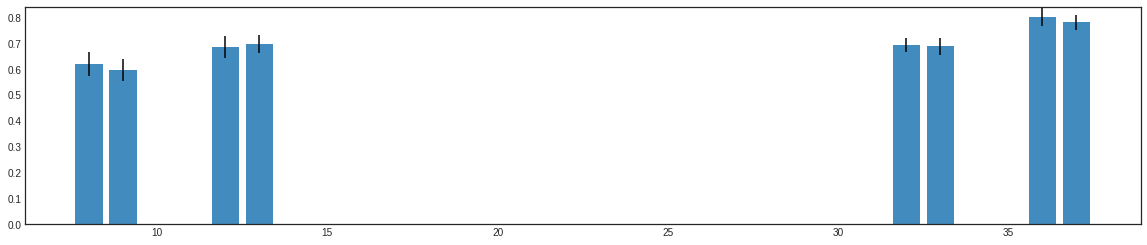

In [201]:
means, stds = get_mc_scores_data_over_datasets(mc_scores_mnist, mc_scores_fmnist, mc_scores_cmnist, estimators, perturbation_types=["Input", "Model"])
plot_mc_scores_over_datasets(means, stds)

In [46]:
for ex1, (estimator_category, metrics) in enumerate(estimators.items()):
    for ex2, estimator_name in enumerate(metrics):
        for px, perturbation_type in enumerate(["Input", "Model"]):
            for explanation_set, benchmark in benchmarks_mnist.items():
                try:
                    name = fix_name(name=explanation_set)
                    fig, _ = plot_single_estimator_area(benchmark, estimator_category, estimator_name, perturbation_type, title=name)
                except:
                    pass
        

Output hidden; open in https://colab.research.google.com to view.

## Analyse benchmarks over datasets

In [47]:
benchmark_mnist["Complexity"]["Sparseness"].keys()

dict_keys(['results_intra_scores', 'results_inter_scores', 'results_eval_scores', 'results_eval_scores_perturbed', 'results_indices_perturbed', 'results_meta_consistency_scores', 'results_consistency_scores'])

In [48]:
def get_benchmark_data_over_datasets(benchmark_mnist, benchmark_fmnist, benchmark_cmnist, estimators, perturbation_types):

    # Collect the data.
    mnist_means = []
    mnist_stds = []
    fmnist_means = []
    fmnist_stds = []
    cmnist_means = []
    cmnist_stds = []

    for ex1, (estimator_category, metrics) in enumerate(estimators.items()):
        for ex2, estimator_name in enumerate(metrics):
            mnist_means_per = []
            mnist_stds_per = []
            fmnist_means_per = []
            fmnist_stds_per = []
            cmnist_means_per = []
            cmnist_stds_per = []

            for px, perturbation_type in enumerate(perturbation_types):
                #print(estimator_category, estimator_name)
                
                mnist_mean = benchmark_mnist[estimator_category][estimator_name]["results_meta_consistency_scores"][perturbation_type]["MC_mean"]
                mnist_std = benchmark_mnist[estimator_category][estimator_name]["results_meta_consistency_scores"][perturbation_type]["MC_std"]
                mnist_means_per.append(mnist_mean)
                mnist_stds_per.append(mnist_std)

                fmnist_mean = benchmark_fmnist[estimator_category][estimator_name]["results_meta_consistency_scores"][perturbation_type]["MC_mean"]
                fmnist_std = benchmark_fmnist[estimator_category][estimator_name]["results_meta_consistency_scores"][perturbation_type]["MC_std"]
                fmnist_means_per.append(fmnist_mean)
                fmnist_stds_per.append(fmnist_std)

                cmnist_mean = benchmark_cmnist[estimator_category][estimator_name]["results_meta_consistency_scores"][perturbation_type]["MC_mean"]
                cmnist_std = benchmark_cmnist[estimator_category][estimator_name]["results_meta_consistency_scores"][perturbation_type]["MC_std"]
                cmnist_means_per.append(cmnist_mean)
                cmnist_stds_per.append(cmnist_std)
            
            mnist_means.append(np.mean(mnist_means_per))
            mnist_stds.append(np.mean(mnist_stds_per))
            fmnist_means.append(np.mean(fmnist_means_per))
            fmnist_stds.append(np.mean(fmnist_stds_per))
            cmnist_means.append(np.mean(cmnist_means_per))
            cmnist_stds.append(np.mean(cmnist_stds_per))
            

    means = np.array([[a, b, c] for a, b, c in zip(mnist_means, fmnist_means, cmnist_means)]).flatten()
    stds = np.array([[a, b, c] for a, b, c in zip(mnist_stds, fmnist_stds, cmnist_stds)]).flatten()

    return means, stds

In [66]:
def plot_benchmarks_over_datasets(means, stds):

    # MNIST, fMNIST, cMNIST
    datasets = ["MNIST", "fMNIST", "cMNIST"]
    nr_datasets = 3

    metrics_short = ["SP", "CO", "FC", "PF", "PG", "RMA", "RL", "MPR", "MS", "LLE"]
    colours_repeat = np.repeat(list(colours.values()), repeats=nr_datasets)
    legend_elements = [matplotlib.patches.Patch(facecolor='white', edgecolor='black', hatch="/"), 
                    matplotlib.patches.Patch(facecolor='white', edgecolor='black', hatch="*"),
                    matplotlib.patches.Patch(facecolor='white', edgecolor='black'),]

    x = [ 0,  1,  2,  4,  5,  6,  8,  9, 10, 12, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 29, 30, 32, 33, 34, 36, 37, 38]
    labels_ticks = list(range(1, np.max(x)+1, nr_datasets+1))
    labels_ticks[0] = 1.5

    # Insert real data.
    #means=np.random.random(size=len(metrics)*nr_datasets)
    #s=np.random.uniform(0, 0.1, len(metrics)*nr_datasets)

    fig, ax = plt.subplots(figsize=(20, 4))
    barlist=ax.bar(x, means, yerr=stds, alpha=0.85)

    ax.bar_label(barlist, fmt='%.2f', label_type='edge', fontsize=15)

    for i in range(0, len(metrics_short)*nr_datasets, 3):
        barlist[i].set_hatch('/')
    for i in range(1, len(metrics_short)*nr_datasets, 3):
        barlist[i].set_hatch('*')
    for i in range(len(metrics_short)*nr_datasets):
        barlist[i].set_color(colours_repeat[i])

    ax.set_xticks(ticks=labels_ticks, labels=metrics_short, fontsize=20)#, rotation=90)
    plt.ylabel("MC", fontsize=20)
    plt.yticks(fontsize=15)
    plt.ylim(np.min(means)-0.1, np.max(means)+0.15)
    ax.legend(handles=legend_elements, labels=datasets, ncol=3, fontsize=15) # loc=2,
    plt.show()


#### Input dependency

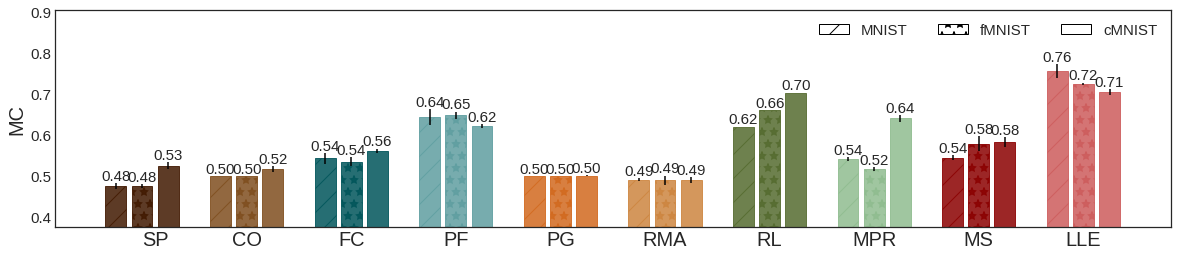

In [67]:
means, stds = get_benchmark_data_over_datasets(benchmark_mnist, benchmark_fmnist, benchmark_cmnist, estimators, perturbation_types=["Input"])
plot_benchmarks_over_datasets(means, stds)

#### Model dependency

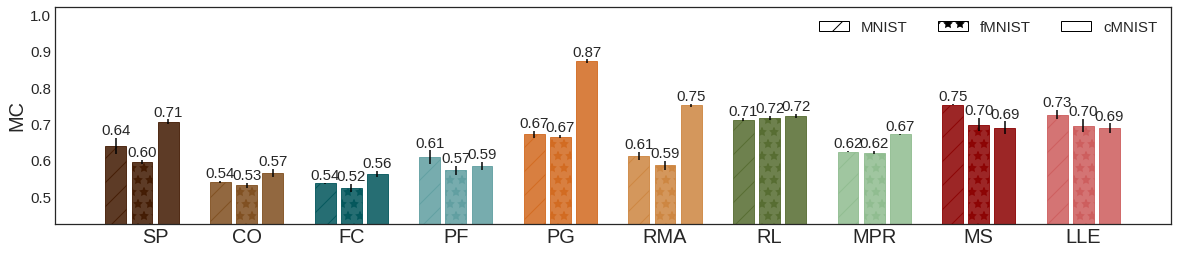

In [68]:
means, stds = get_benchmark_data_over_datasets(benchmark_mnist, benchmark_fmnist, benchmark_cmnist, estimators, perturbation_types=["Model"])
plot_benchmarks_over_datasets(means, stds)

#### Both input and model


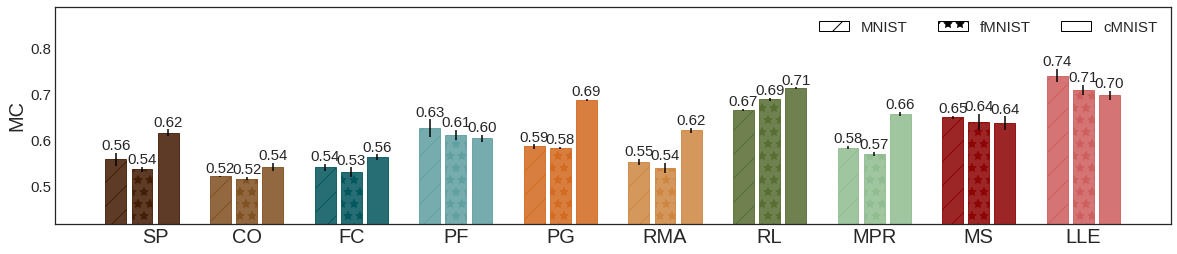

In [69]:
means, stds = get_benchmark_data_over_datasets(benchmark_mnist, benchmark_fmnist, benchmark_cmnist, estimators, perturbation_types=["Model", "Input"])
plot_benchmarks_over_datasets(means, stds)

## Analyse rankings over datasets

In [174]:
"""
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
hatches = ['//', '\\\\', '||', '--', '++', 'xx', 'oo', 'OO', '..', '**'] 
hatches = ['/o', '\\|', '|*', '-\\', '+o', 'x*', 'o-', 'O|', 'O.', '*-']

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
barlist1=ax.bar(settings, iec_nr, alpha=0.65, color='lightgray', label="IEC_NR") ##aaa662
barlist2=ax.bar(settings, iac_nr, alpha=0.65,  bottom=iec_nr,  color='darkgray', label="IAC_NR") ##719f91
barlist3=ax.bar(settings, iec_ar, alpha=0.65, bottom=(iac_nr+iec_nr),  color='gray',  label="IEC_AR") ##c87f89
barlist4=ax.bar(settings, iac_ar, alpha=0.65, bottom=(iec_ar+iac_nr+iec_nr), yerr=mc_scores_std, color='#738595', label="IAC_AR", hatch="") #738595#afa88b

#plt.plot(2+mc_scores, "-o", c="black")

for i in settings:
    if mc_scores[i] == mc_scores.max():
        plt.annotate(xy=(i-0.4, 1.7+mc_scores[i]), text=f"{(str(mc_scores[i]))[:5]}", fontsize=20, c="red", weight='bold')
    else:
        plt.annotate(xy=(i-0.4, 1.7+mc_scores[i]), text=f"{(str(mc_scores[i]))[:5]}", fontsize=20, weight='bold')

ax.bar_label(barlist1, fmt='%.3f', label_type='center', fontsize=20)
ax.bar_label(barlist2, fmt='%.3f', label_type='center', fontsize=20)
ax.bar_label(barlist3, fmt='%.3f', label_type='center', fontsize=20)
ax.bar_label(barlist4, fmt='%.3f', label_type='center', fontsize=20)

ax.set_yticks([])
ax.set_xticks(ticks=np.arange(0, len(df_result)), labels=[f"P{i+1}" for i in range(len(df_result))], fontsize=20)
ax.legend(ncol=4, fontsize=20) # loc=2,
ax.grid()
plt.xlabel(" ", fontsize=20)
plt.ylabel(" ", fontsize=20)
plt.tight_layout()
plt.ylim(0, 2.8)

totals = (iec_nr+iac_nr+iec_ar+iac_ar)
y1 = (iec_nr)
y2 = (iec_nr+iac_nr)
y3 = (iec_nr+iac_nr+iec_ar)
y4 = (iec_nr+iac_nr+iec_ar+iac_ar)

c1 = "#82cbb2"
c2 = "#cc7a8b"
c3 = "#76a973"
c4 = "#5a86ad"

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(settings, y1, color="black")
plt.plot(settings, y2, color="black")
plt.plot(settings, y3, color="black")
plt.plot(settings, y4, color="black")

plt.fill_between(settings, y1,0, color=c1, alpha=0.75, label="IEC_NR", edgecolor="black")
plt.fill_between(settings, y1, y2, color=c2, alpha=0.75, label="IAC_NR", edgecolor="black")
plt.fill_between(settings, y2, y3, color=c3, alpha=0.75, label="IEC_AR", edgecolor="black")
plt.fill_between(settings, y3, y4, color=c4, alpha=0.75, label="IAC_AR", edgecolor="black")

for i in settings:
    if mc_scores[i] == mc_scores.max():
        plt.annotate(xy=(i-0.4, 1.7+mc_scores[i]), text=f"{(str(mc_scores[i]))[:5]}", fontsize=20, c="red", weight='bold')
    else:
        plt.annotate(xy=(i-0.4, 1.7+mc_scores[i]), text=f"{(str(mc_scores[i]))[:5]}", fontsize=20, weight='bold')

    plt.vlines(x=i, ymin=0, ymax=1.6+mc_scores[i], color="black")
               
plt.yticks([])
plt.legend(ncol=4, fontsize=20) 
plt.xticks(ticks=np.arange(0, len(df_result)), labels=[f"P{i+1}" for i in range(len(df_result))], fontsize=20)
plt.grid()
plt.xlabel(" ", fontsize=20)
plt.ylabel(" ", fontsize=20)
plt.ylim(0, 2.8)
plt.tight_layout()
""";

In [177]:
def get_ranking_data_over_datasets(benchmark_mnist, benchmark_fmnist, benchmark_cmnist, estimators, perturbation_types):

    # Collect the data.
    means_mnist = {}
    means_fmnist = {}
    means_cmnist = {}
    
    for ex1, (estimator_category, metrics) in enumerate(estimators.items()):

        means_mnist[estimator_category] = {}
        means_fmnist[estimator_category] = {}
        means_cmnist[estimator_category] = {}

        for px, perturbation_type in enumerate(perturbation_types):
            means_mnist[estimator_category][perturbation_type] = {}
            means_fmnist[estimator_category][perturbation_type] = {}
            means_cmnist[estimator_category][perturbation_type] = {}

            for ex2, estimator_name in enumerate(metrics):

                mnist_mean = benchmark_mnist[estimator_category][estimator_name]["results_meta_consistency_scores"][perturbation_type]["MC_means"]
                means_mnist[estimator_category][perturbation_type][estimator_name] = mnist_mean

                fmnist_mean = benchmark_fmnist[estimator_category][estimator_name]["results_meta_consistency_scores"][perturbation_type]["MC_means"]
                means_fmnist[estimator_category][perturbation_type][estimator_name] = fmnist_mean

                cmnist_mean = benchmark_cmnist[estimator_category][estimator_name]["results_meta_consistency_scores"][perturbation_type]["MC_means"]
                means_cmnist[estimator_category][perturbation_type][estimator_name] = cmnist_mean

    return means_mnist, means_fmnist, means_mnist

In [180]:
means_mnist, means_fmnist, means_cmnist = get_ranking_data_over_datasets(benchmark_mnist, benchmark_fmnist, benchmark_cmnist, estimators, perturbation_types=["Input", "Model"])

In [186]:
estimator_category = "Robustness"


for estimator_category in estimators:
    print(f"{estimator_category}")
    for perturbation_type in ["Input", "Model"]:   
        print(f"\t{perturbation_type}")
        for means_ds, dataset_name in zip([means_mnist, means_mnist, means_cmnist], ["MNIST", "fMNIST", "cMNIST"]):
            
            estimator_names = list(means_ds[estimator_category][perturbation_type].keys())
            estimator_name_1, estimator_name_2 = estimator_names[0], estimator_names[1]
            values = np.array(list(means_ds[estimator_category][perturbation_type].values()))

            rank_data = np.argsort([values[0], values[1]], axis=0)
            rank_fraction = np.mean(rank_data, axis=1)
            rank_dist_1, rank_dist_2 = rank_fraction[0], rank_fraction[1]
            print(f"\t  {dataset_name}.  {estimator_name_1}: {rank_dist_1*100}% {estimator_name_2}: {rank_dist_2*100}%")

Complexity
	Input
	  MNIST.  Sparseness: 0.0% Complexity: 100.0%
	  fMNIST.  Sparseness: 0.0% Complexity: 100.0%
	  cMNIST.  Sparseness: 0.0% Complexity: 100.0%
	Model
	  MNIST.  Sparseness: 100.0% Complexity: 0.0%
	  fMNIST.  Sparseness: 100.0% Complexity: 0.0%
	  cMNIST.  Sparseness: 100.0% Complexity: 0.0%
Faithfulness
	Input
	  MNIST.  Faithfulness Correlation: 0.0% Pixel-Flipping: 100.0%
	  fMNIST.  Faithfulness Correlation: 0.0% Pixel-Flipping: 100.0%
	  cMNIST.  Faithfulness Correlation: 0.0% Pixel-Flipping: 100.0%
	Model
	  MNIST.  Faithfulness Correlation: 0.0% Pixel-Flipping: 100.0%
	  fMNIST.  Faithfulness Correlation: 0.0% Pixel-Flipping: 100.0%
	  cMNIST.  Faithfulness Correlation: 0.0% Pixel-Flipping: 100.0%
Localisation
	Input
	  MNIST.  Pointing-Game: 100.0% Relevance Mass Accuracy: 0.0%
	  fMNIST.  Pointing-Game: 100.0% Relevance Mass Accuracy: 0.0%
	  cMNIST.  Pointing-Game: 100.0% Relevance Mass Accuracy: 0.0%
	Model
	  MNIST.  Pointing-Game: 100.0% Relevance Mass Ac

In [ ]:
# Plot results!
fig, ax = plt.subplots(figsize=(6.5,5))

nstacke
ax.spines["right"].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('Frequency of rank', fontsize=15)
ax.set_xlabel('')
ax.set_xticklabels(["A", "B", "C", "D", "SAL", "GS", "IG", "FG"])
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4, fancybox=True, shadow=False, labels=['1st', "2nd", "3rd", "4th"])
#plt.axvline(x=3.5, ymax=0.95, color='black', linestyle='-')
plt.tight_layout()

## Analyse combined


In [189]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, min(y_value*1.1, 0.85)),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.



In [190]:
df = make_scatter_df(benchmark=benchmark_mnist, estimators=estimators)
#df_fmnist = make_scatter_df(benchmark=benchmark_fmnist, estimators=estimators)
#df_cmnist = make_scatter_df(benchmark=benchmark_cmnist, estimators=estimators)
means, stds = get_benchmark_data_over_datasets(benchmark_mnist, benchmark_fmnist, benchmark_cmnist, estimators, perturbation_types=["Model", "Input"])

FileNotFoundError: ignored

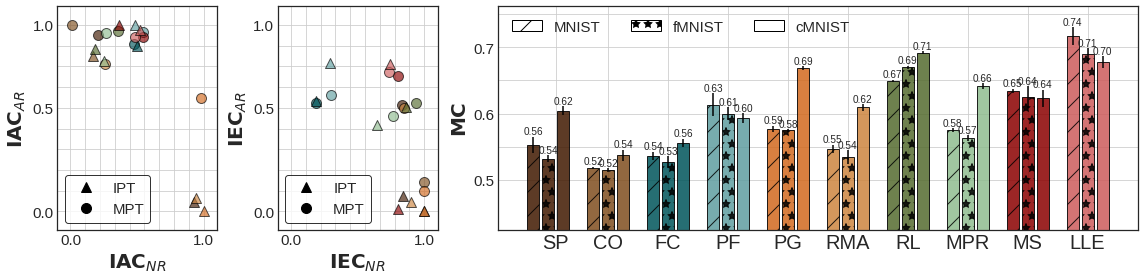

In [193]:
import matplotlib.lines as mlines

legend_elements = [mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='IPT'), 
                   mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=10, label='MPT')]
markers = {"Input": "^", "Model": "o"} # ['s', '*', '^']


fig, ax = plt.subplots(1, 3, figsize=(16, 4), gridspec_kw={'width_ratios': [1, 1, 4]})

df = df_mnist
for x, y, col, t in zip(df["IAC_{NR}"].values, df["IAC_{AR}"].values, df["Estimator"].values, df["Test"].values):
    ax[0].scatter(x=x, y=y, marker=markers[t], c=colours[col], s=100, label=t, alpha=0.65, edgecolor="black")
for x, y, col, t in zip(df["IEC_{NR}"].values, df["IEC_{AR}"].values, df["Estimator"].values, df["Test"].values):
    ax[1].scatter(x=x, y=y, marker=markers[t], c=colours[col], s=100, label=t, alpha=0.65, edgecolor="black")
"""
df = df_fmnist
for x, y, col, t in zip(df["IAC_{NR}"].values, df["IAC_{AR}"].values, df["Estimator"].values, df["Test"].values):
    ax[0].scatter(x=x, y=y, marker=markers[t], c=colours[col], s=100, label=t, alpha=0.65, edgecolor="black")
for x, y, col, t in zip(df["IEC_{NR}"].values, df["IEC_{AR}"].values, df["Estimator"].values, df["Test"].values):
    ax[1].scatter(x=x, y=y, marker=markers[t], c=colours[col], s=100, label=t, alpha=0.65, edgecolor="black")

df = df_cmnist
for x, y, col, t in zip(df["IAC_{NR}"].values, df["IAC_{AR}"].values, df["Estimator"].values, df["Test"].values):
    ax[0].scatter(x=x, y=y, marker=markers[t], c=colours[col], s=100, label=t, alpha=0.65, edgecolor="black")
for x, y, col, t in zip(df["IEC_{NR}"].values, df["IEC_{AR}"].values, df["Estimator"].values, df["Test"].values):
    ax[1].scatter(x=x, y=y, marker=markers[t], c=colours[col], s=100, label=t, alpha=0.65, edgecolor="black")
"""

ax[0].legend(handles=legend_elements,  fontsize=15, frameon=True, edgecolor="black", loc="lower left")
ax[0].set_ylabel("$\mathbf{IAC}_{AR}$", fontsize=20)
ax[0].set_xlabel("$\mathbf{IAC}_{NR}$", fontsize=20)
ax[0].set_ylim(-0.1, 1.1)
ax[0].set_xlim(-0.1, 1.1)
ax[0].set_xticks(ticks=np.linspace(0, 1, 10), labels=[0.0, "", "", "", "", "", "", "", "", 1.0], fontsize=15)
ax[0].set_yticks(ticks=np.linspace(0, 1, 10), labels=[0.0, "", "", "", "", 0.5, "", "", "", 1.0], fontsize=15)
ax[0].grid()

ax[1].legend(handles=legend_elements,  fontsize=15, frameon=True, edgecolor="black", loc="lower left")
ax[1].set_ylabel("$\mathbf{IEC}_{AR}$", fontsize=20)
ax[1].set_xlabel("$\mathbf{IEC}_{NR}$", fontsize=20)
ax[1].set_ylim(-0.1, 1.1)
ax[1].set_xlim(-0.1, 1.1)
ax[1].set_xticks(ticks=np.linspace(0, 1, 10), labels=[0.0, "", "", "", "", "", "", "", "", 1.0], fontsize=15)
ax[1].set_yticks(ticks=np.linspace(0, 1, 10), labels=[0.0, "", "", "", "", 0.5, "", "", "", 1.0], fontsize=15)
ax[1].grid()


 # MNIST, fMNIST, cMNIST
datasets = ["MNIST", "fMNIST", "cMNIST"]
nr_datasets = 3

metrics_short = ["SP", "CO", "FC", "PF", "PG", "RMA", "RL", "MPR", "MS", "LLE"]
colours_repeat = np.repeat(list(colours.values()), repeats=nr_datasets)
legend_elements = [matplotlib.patches.Patch(facecolor='white', edgecolor='black', hatch="/"), 
                   matplotlib.patches.Patch(facecolor='white', edgecolor='black', hatch="*"),
                   matplotlib.patches.Patch(facecolor='white', edgecolor='black'),]

x = [ 0,  1,  2,  4,  5,  6,  8,  9, 10, 12, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 29, 30, 32, 33, 34, 36, 37, 38]
labels_ticks = list(range(1, np.max(x)+1, nr_datasets+1))
labels_ticks[0] = 1.5

# Plot!
barlist = ax[2].bar(x, means, yerr=stds, alpha=0.85, edgecolor="black")

# Alt 1.
ax[2].bar_label(barlist, fmt='%.2f', label_type='edge', fontsize=10)

# Alt 2.
# Call the function above. All the magic happens there.
#add_value_labels(ax=ax[2])

for i in range(0, len(metrics_short)*nr_datasets, 3):
    barlist[i].set_hatch('/')
for i in range(1, len(metrics_short)*nr_datasets, 3):
    barlist[i].set_hatch('*')
for i in range(len(metrics_short)*nr_datasets):
    barlist[i].set_color(colours_repeat[i])
for i in range(len(metrics_short)*nr_datasets):
    barlist[i].set_edgecolor("black")

ax[2].set_xticks(ticks=labels_ticks, labels=metrics_short, fontsize=20)#, rotation=90)
ax[2].set_ylabel("$\mathbf{MC}$", fontsize=20)
ax[2].set_yticks(ticks=np.linspace(0.5, 1.0, 10), labels=[0.5, "", 0.6, "", 0.7, "", 0.8, "", "", ""], fontsize=15)
ax[2].set_ylim(np.min(means)-0.1, np.max(means)+0.05)
ax[2].legend(handles=legend_elements, labels=datasets, ncol=3, fontsize=15) # loc=2,
ax[2].grid()

plt.tight_layout()
plt.savefig(path_results+"plots/"+"benchmarking_all.png", dpi=400)

## Analyse sanity checks

In [ ]:
# Get benchmarking data.
path = Path(path_results+"sanity_checks/")    
[str(f.stem) for f in list(path.iterdir())]

['01122022_Estimator_Different_inter_scores_187a',
 '01122022_Estimator_Different_indices_correct_187a',
 '01122022_Estimator_Same_consistency_scores_62a3',
 '01122022_Estimator_Different_eval_scores_perturbed_5df1',
 '01122022_Estimator_Same_indices_perturbed_62a3',
 '01122022_Estimator_Same_indices_correct_62a3',
 '01122022_Estimator_Different_intra_scores_5df1',
 '01122022_Estimator_Same_eval_scores_perturbed_62a3',
 '24112022_Complement_NR_indices_correct_6746',
 '24112022_Complement_AR_inter_scores_aeda',
 '24112022_Complement_AR_indices_perturbed_36c6',
 '01122022_Estimator_Different_indices_perturbed_187a',
 '01122022_Estimator_Different_indices_correct_5df1',
 '24112022_Complement_AR_eval_scores_5bdc',
 '24112022_Complement_AR_intra_scores_bec3',
 '24112022_Complement_AR_intra_scores_5bdc',
 '24112022_Complement_NR_intra_scores_ed25',
 '01122022_Estimator_Different_eval_scores_5df1',
 '01122022_Estimator_Different_meta_consistency_scores_187a',
 '24112022_Complement_NR_intra_sc

In [ ]:
today = "01122022"
uid_nr = "187a"
uid_ar = "62a3"
iters = 3
K = 5

def print_mean_std(score_type: str, expectation: str, scores: np.array):
    if "IAC" in score_type:
        score_means = scores.mean(axis=(0, 2))
    else:
        score_means = scores.mean(axis=1)
    print(f"\t{score_type}={score_means.mean():.4f} ({score_means.std():.3f}) \t-----\tExpectation{expectation}")


for perturbation_type in  ["Input", "Model"]:

    print(
        f"\nControlled scenario 1: the estimator always returns the same score, independent of perturbation (deterministic sampling). uid={uid_ar}\n")
    print(f"{perturbation_type} Perturbation Test")

    inter_scores_nr = np.array(
        load_obj(path_results + "sanity_checks/", fname=f"{today}_Estimator_Same_inter_scores_{uid_ar}", use_json=True)[
            f"{perturbation_type} Resilience Test"]).reshape(iters, K)
    intra_scores_nr = load_obj(path_results + "sanity_checks/", fname=f"{today}_Estimator_Same_intra_scores_{uid_ar}",
                                use_json=True)
    intra_scores_nr = np.array(list(intra_scores_nr[f"{perturbation_type} Resilience Test"].values())).reshape(
        len(xai_methods), iters, K)
    inter_scores_ar = np.array(
        load_obj(path_results + "sanity_checks/", fname=f"{today}_Estimator_Same_inter_scores_{uid_ar}", use_json=True)[
            f"{perturbation_type} Adversary Test"]).reshape(iters, K)
    intra_scores_ar = load_obj(path_results + "sanity_checks/", fname=f"{today}_Estimator_Same_intra_scores_{uid_ar}",
                                use_json=True)
    intra_scores_ar = np.array(list(intra_scores_ar[f"{perturbation_type} Adversary Test"].values())).reshape(
        len(xai_methods), iters, K)

    print_mean_std(score_type="IAC_{NR}", expectation="=1.0 (should succeed: scores are the same!)",
                    scores=intra_scores_nr)
    print_mean_std(score_type="IAC_{AR}", expectation="=0.0 (should fail: scores are not different!)",
                    scores=intra_scores_ar)
    print_mean_std(score_type="IEC_{NR}", expectation="=1.0 (should succed: scores, then rankings are the same!)",
                    scores=inter_scores_nr)
    print_mean_std(score_type="IEC_{AR}",
                    expectation="=0.0 (should fail: does not fulfil ranking condition '<' since '=')",
                    scores=inter_scores_ar)

    
    print(
        f"\nControlled scenario 2: the estimator always returns scores from a different distribution (stochastic sampling). uid={uid_nr}\n")
    print(f"{perturbation_type} Perturbation Test")

    inter_scores_nr = np.array(
        load_obj(path_results + "sanity_checks/", fname=f"{today}_Estimator_Different_inter_scores_{uid_nr}", use_json=True)[
            f"{perturbation_type} Resilience Test"]).reshape(iters, K)
    intra_scores_nr = load_obj(path_results + "sanity_checks/", fname=f"{today}_Estimator_Different_intra_scores_{uid_nr}",
                                use_json=True)
    intra_scores_nr = np.array(list(intra_scores_nr[f"{perturbation_type} Resilience Test"].values())).reshape(
        len(xai_methods), iters, K)
    inter_scores_ar = np.array(
        load_obj(path_results + "sanity_checks/", fname=f"{today}_Estimator_Different_inter_scores_{uid_nr}", use_json=True)[
            f"{perturbation_type} Adversary Test"]).reshape(iters, K)
    intra_scores_ar = load_obj(path_results + "sanity_checks/", fname=f"{today}_Estimator_Different_intra_scores_{uid_nr}",
                                use_json=True)
    intra_scores_ar = np.array(list(intra_scores_ar[f"{perturbation_type} Adversary Test"].values())).reshape(
        len(xai_methods), iters, K)

    print_mean_std(score_type="IAC_{NR}", expectation="≈0.0 (should fail: scores are different!)", scores=intra_scores_nr)
    print_mean_std(score_type="IAC_{AR}", expectation="≈1.0 (should succeed: scores are different!)",
                    scores=intra_scores_ar)
    print_mean_std(score_type="IEC_{NR}",
                    expectation="≈0.25 (should be =1/L, where L=4: no diff in scores between explainers)",
                    scores=inter_scores_nr)
    print_mean_std(score_type="IEC_{AR}", expectation="≈0.0 (depends on the sampling distributions and its variation!)",
    scores=inter_scores_ar)
    


Controlled scenario 1: the estimator always returns the same score, independent of perturbation (deterministic sampling). uid=62a3

Input Perturbation Test
	IAC_{NR}=1.0000 (0.000) 	-----	Expectation=1.0 (should succeed: scores are the same!)
	IAC_{AR}=0.0000 (0.000) 	-----	Expectation=0.0 (should fail: scores are not different!)
	IEC_{NR}=1.0000 (0.000) 	-----	Expectation=1.0 (should succed: scores, then rankings are the same!)
	IEC_{AR}=0.0000 (0.000) 	-----	Expectation=0.0 (should fail: does not fulfil ranking condition '<' since '=')

Controlled scenario 2: the estimator always returns scores from a different distribution (stochastic sampling). uid=187a

Input Perturbation Test
	IAC_{NR}=0.0000 (0.000) 	-----	Expectation≈0.0 (should fail: scores are different!)
	IAC_{AR}=1.0000 (0.000) 	-----	Expectation≈1.0 (should succeed: scores are different!)
	IEC_{NR}=0.2480 (0.004) 	-----	Expectation≈0.25 (should be =1/L, where L=4: no diff in scores between explainers)
	IEC_{AR}=0.0000 (0.

## Redundant

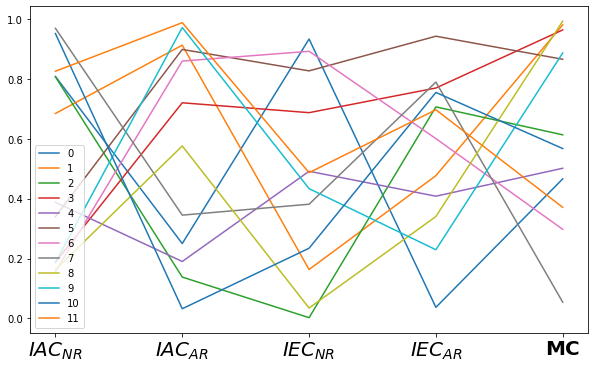

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

nr_settings = 12
nr_scores = 5

dummy_scores = np.array([np.random.random(size=nr_scores) for _ in range(nr_settings)])

fig, ax = plt.subplots(figsize=(10, 6))
for setting_id, setting in enumerate(dummy_scores):
    plt.plot(setting, label=setting_id)
plt.legend()
ax.set_xticks(ticks=np.arange(0, nr_scores), labels=["$IAC_{NR}$", "$IAC_{AR}$", "$IEC_{NR}$", "$IEC_{AR}$", "$\matbf{MC}$"], fontsize=20)#, rotation=90)

In [ ]:
benchmark = benchmark_mnist 
plt.style.use(['seaborn-white'])
perturbation_type = "Input"

fig, axs = plt.subplots(2, 5, sharex=True, figsize=(20, 8)) #sharex=True, sharey=True, 


for ex1, (estimator_category, metrics) in enumerate(estimators.items()):
    for ex2, estimator_name in enumerate(metrics):

        intra_scores_res = np.array(list(benchmark[estimator_category][estimator_name]["intra_scores"][f"{perturbation_type} Resilience Test"].values())).flatten()
        intra_scores_adv = np.array(list(benchmark[estimator_category][estimator_name]["intra_scores"][f"{perturbation_type} Adversary Test"].values())).flatten()
        inter_scores_res = np.array(benchmark[estimator_category][estimator_name]['inter_scores'][f"{perturbation_type} Resilience Test"])
        inter_scores_adv = np.array(benchmark[estimator_category][estimator_name]['inter_scores'][f"{perturbation_type} Adversary Test"])
        
        X_gt = [-1, 0, 1, 0]
        Y_gt = [0, 1, 0, -1]
        X_area = [-intra_scores_adv.mean(), 0, inter_scores_adv.mean(), 0]
        Y_area = [0, intra_scores_res.mean(), 0, -inter_scores_res.mean()]

        scores = np.array([intra_scores_adv.mean(), inter_scores_adv.mean(), intra_scores_res.mean(), inter_scores_res.mean()])
        axs[ex2, ex1].fill(X_gt, Y_gt, color="black", alpha=0.1)
        #axs[ex2, ex1].fill(X_area, Y_area, color=list(cnames.values())[(ex1*20)+(ex2+1)], alpha=0.5)
        axs[ex2, ex1].fill(X_area, Y_area, color=colours[estimator_name], alpha=0.5)
        # Annotate.
        #axs[ex2, ex1].annotate("${IAC}_{AR}$"+f"={intra_scores_adv.mean():.2f}", (-intra_scores_adv.mean(), 0.1), fontsize=12)
        #axs[ex2, ex1].annotate("${IAC}_{NR}$"+f"={intra_scores_res.mean():.2f}", (-0.2, intra_scores_res.mean()+0.05), fontsize=12)
        #axs[ex2, ex1].annotate("\n\n${IEC}_{AR}$"+f"={inter_scores_adv.mean():.2f}", (inter_scores_adv.mean(), 0.1), fontsize=12)
        #axs[ex2, ex1].annotate("${IEC}_{NR}$"+f"={inter_scores_res.mean():.2f}", (-0.2, -inter_scores_res.mean()-0.1), fontsize=12)
        
        axs[ex2, ex1].annotate("${IAC}_{AR}$", (-1, 0), fontsize=12)
        axs[ex2, ex1].annotate("${IAC}_{NR}$", (-0.2, 0.8), fontsize=12)
        axs[ex2, ex1].annotate("${IEC}_{AR}$", (0.7, 0), fontsize=12)
        axs[ex2, ex1].annotate("${IEC}_{NR}$", (-0.2, -0.8), fontsize=12)
        
        # Labels.
        axs[ex2, ex1].set_xticklabels(["", "1", "0.5",  "0", "0.5", "1"], fontsize=14)
        
        axs[ex2, ex1].set_yticklabels(["", "1", "", "0.5", "",  "0", "", "0.5", "", "1", ""], fontsize=14)
        if estimator_name == "Model Parameter Randomisation Test":
            estimator_name = "Model Parameter Randomisation"
        axs[ex2, ex1].set_title(f"{estimator_name} ({scores.mean():.2f})", fontsize=14)
        axs[ex2, ex1].grid()

        #axs[ex2, ex1].plot([0, 0], [-1, 1], '--bo', label='NR')
        #axs[ex2, ex1].plot([-1, 1], [0, 0], '--go', label='AR')

        # Limits.
        #axs[ex2, ex1].set_xlim(-1.6, 1.6)
        #axs[ex2, ex1].set_ylim(-1.6, 1.6)
        plt.grid()
            

In [ ]:
estimator_category = "Complexity"
estimator_name = "Sparseness" #
perturbation_type = "Model"

intra_scores_res = np.array(list(benchmark[estimator_category][estimator_name]["intra_scores"][f"{perturbation_type} Resilience Test"].values())).flatten()
intra_scores_adv = np.array(list(benchmark[estimator_category][estimator_name]["intra_scores"][f"{perturbation_type} Adversary Test"].values())).flatten()
inter_scores_res = np.array(benchmark[estimator_category][estimator_name]['inter_scores'][f"{perturbation_type} Resilience Test"])
inter_scores_adv = np.array(benchmark[estimator_category][estimator_name]['inter_scores'][f"{perturbation_type} Adversary Test"])

#sns.distplot(intra_scores_res, color="green", label="Resilience")
#sns.distplot(intra_scores_adv, color="red", label="Adversary")
#plt.show()

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.set_facecolor("white")

print([intra_scores_res.mean(), inter_scores_res.mean(), intra_scores_adv.mean(), inter_scores_adv.mean()])
plt.fill([-1, -1, 1, -1], [-1, 1, -1, -1], color="black", alpha=0.25)
plt.fill([-1, -1, intra_scores_adv.mean(), inter_scores_adv.mean()], [-inter_scores_res.mean(), intra_scores_res.mean(), 0, -1], color="red", alpha=0.5)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axis('off');

### In general, which faithfulness/ complexity/ robustness/ randomisation/ localisation measure is the best?

In [ ]:
def get_quick_stats(estimator_category: str, tests: list, estimators: dict):
    for estimator_name in estimators[estimator_category]:
        print(f"{estimator_name}\t")
        for test in tests:
            if "Resilience" in test:
                arrow = "⬆"
            else:
                arrow = "⬇"
            print(f"\t{test}\t")
            print(f"\t\tIntra ({arrow}): {get_statistics_intra_scores(benchmark[estimator_category][estimator_name]['intra_scores'], test=test)}\n\t\t" \
            f"Inter (⬆): {get_statistics_inter_scores(benchmark[estimator_category][estimator_name]['inter_scores'], test=test)}")

In [ ]:
get_quick_stats(estimator_category="Faithfulness", tests=analyser_suite, estimators=estimators)

Faithfulness Correlation	
	Model Resilience Test	
		Intra (⬆): (0.43291534771913087, 0.26704790998120126)
		Inter (⬆): (0.29697265625, 0.007193826296192115)
	Input Resilience Test	
		Intra (⬆): (0.5134696717803475, 0.3294217667384682)
		Inter (⬆): (0.2925537109375, 0.013423760953302494)
	Model Adversary Test	
		Intra (⬇): (0.258304451677822, 0.33331090833387034)
		Inter (⬆): (0.5988094617767824, 0.0059963673019729396)
	Input Adversary Test	
		Intra (⬇): (0.18616201881813377, 0.2800438795438413)
		Inter (⬆): (0.6006090673901017, 0.00398534448926149)
Pixel-Flipping	
	Model Resilience Test	
		Intra (⬆): (0.5534743811997412, 0.3080313741150198)
		Inter (⬆): (0.427392578125, 0.004958158901362693)
	Input Resilience Test	
		Intra (⬆): (0.5010081657855457, 0.30762110217307315)
		Inter (⬆): (0.4307373046875, 0.006965542110533517)
	Model Adversary Test	
		Intra (⬇): (0.05642619206106788, 0.18292807112455406)
		Inter (⬆): (0.6251921255360707, 0.14689803503108495)
	Input Adversary Test	
		Intra (⬇

In [ ]:
get_quick_stats(estimator_category="Randomisation", tests=analyser_suite, estimators=estimators)

Random Logit	
	Model Resilience Test	
		Intra (⬆): (0.22609878445369452, 0.283488528448647)
		Inter (⬆): (0.99658203125, 0.0009518353852352503)
	Input Resilience Test	
		Intra (⬆): (0.21726307491146796, 0.2695215216882422)
		Inter (⬆): (0.906005859375, 0.0)
	Model Adversary Test	
		Intra (⬇): (0.005360552400390957, 0.01906657126639607)
		Inter (⬆): (0.4277243164777159, 0.050037262690806716)
	Input Adversary Test	
		Intra (⬇): (1.513748465780375e-06, 2.621884046999899e-06)
		Inter (⬆): (0.4557205720572057, 5.551115123125783e-17)
Model Parameter Randomisation Test	
	Model Resilience Test	
		Intra (⬆): (0.36804255263779484, 0.34320325898023096)
		Inter (⬆): (0.99365234375, 0.0)
	Input Resilience Test	
		Intra (⬆): (0.22964501354285938, 0.2857865450348358)
		Inter (⬆): (0.835498046875, 0.005267783065164212)
	Model Adversary Test	
		Intra (⬇): (0.019104903129628686, 0.0313243910925978)
		Inter (⬆): (0.44844789356984477, 0.0)
	Input Adversary Test	
		Intra (⬇): (0.21073275916181844, 0.261506

### Get all intra-scores over all XAI methods.

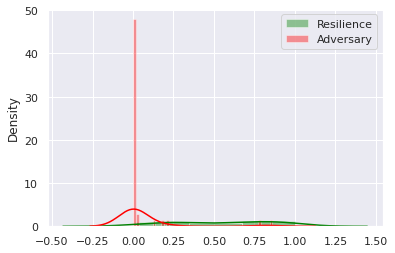

In [ ]:
estimator_category = "Faithfulness"
estimator_name = "Pixel-Flipping"
test = "Model Resilience Test"
intra_scores_res = np.array(list(benchmark[estimator_category][estimator_name]["intra_scores"][test].values())).flatten()
test = "Model Adversary Test"
intra_scores_adv = np.array(list(benchmark[estimator_category][estimator_name]["intra_scores"][test].values())).flatten()

sns.distplot(intra_scores_res, color="green", label="Resilience")
sns.distplot(intra_scores_adv, color="red", label="Adversary")
plt.legend();

### Get all scores over one specific XAI method.

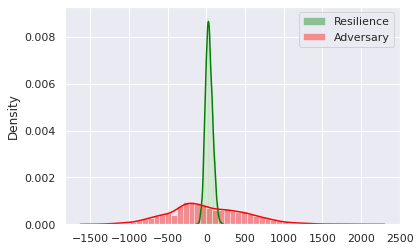

In [ ]:
iter = "1"
xai_method = "IntegratedGradients"
test = "Model Resilience Test"
eval_scores_perturbed_res = benchmark[estimator_category][estimator_name]["eval_scores_perturbed"][test][iter][xai_method]
test = "Model Adversary Test"
eval_scores_perturbed_adv = benchmark[estimator_category][estimator_name]["eval_scores_perturbed"][test][iter][xai_method]

sns.distplot(eval_scores_perturbed_res, color="green", label="Resilience")
sns.distplot(eval_scores_perturbed_adv, color="red", label="Adversary")
plt.legend();

### How does the score distribution change over different XAI methods?

In [ ]:
intra_scores

[[0.7926824644589086,
  0.24466799870445965,
  0.8660287796622268,
  0.6276106923688685,
  0.016661745769866947],
 [0.6655428307293754,
  0.34951232333494153,
  0.7517884445816739,
  0.014750140789962259,
  0.19725036442712607]]

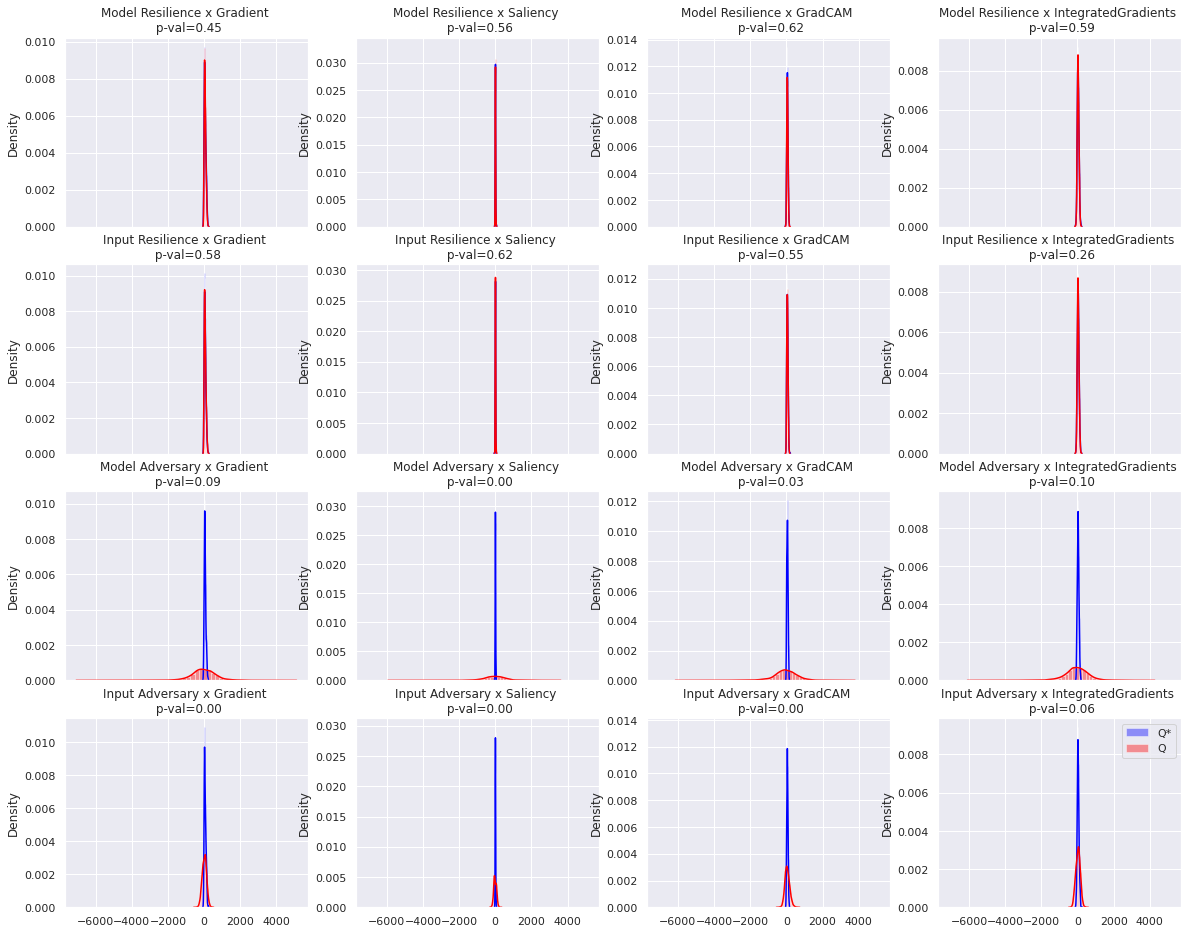

In [ ]:
test = "Model Adversary Test"

# Plot it!
fig, axs = plt.subplots(4, 4, sharex=True, figsize=(20, 16))
for ti, test in enumerate(analyser_suite):
    for xi, xai_method in enumerate(xai_methods):
        eval_scores = benchmark[estimator_category][estimator_name]["eval_scores"][test][xai_method]
        sns.distplot(eval_scores, color="blue", ax=axs[ti, xi], label="Q*")
        perturbed_scores=[]
        for iter in range(2):
            eval_scores_perturbed = benchmark[estimator_category][estimator_name]["eval_scores_perturbed"][test][str(iter)][xai_method]
            perturbed_scores.append(eval_scores_perturbed)
        sns.distplot(np.array(perturbed_scores).flatten(), color="red", ax=axs[ti, xi], label="Q")
        intra_scores = benchmark[estimator_category][estimator_name]["intra_scores"][test][xai_method]
        axs[ti, xi].set_title(f"{test.replace(' Test', '')} x {xai_method} \n p-val={np.mean(intra_scores):.2f}")
plt.legend()
plt.show()

In [ ]:
def plot_estimator_area(benchmark: dict,
                        estimator_category: str, 
                        estimator_name: str,
                        perturbation_type: str
                        ):
    
    intra_scores_res = np.array(list(benchmark[estimator_category][estimator_name]["intra_scores"][f"{perturbation_type} Resilience Test"].values())).flatten()
    intra_scores_adv = np.array(list(benchmark[estimator_category][estimator_name]["intra_scores"][f"{perturbation_type} Adversary Test"].values())).flatten()
    inter_scores_res = np.array(benchmark[estimator_category][estimator_name]['inter_scores'][f"{perturbation_type} Resilience Test"])
    inter_scores_adv = np.array(benchmark[estimator_category][estimator_name]['inter_scores'][f"{perturbation_type} Adversary Test"])

    fig = plt.figure(figsize=(5, 5))
    ax = plt.axes()
    plt.grid()

    X_gt = [-1, 0, 1, 0]
    Y_gt = [0, 1, 0, -1]
    X_area = [-intra_scores_adv.mean(), 0, inter_scores_adv.mean(), 0]
    Y_area = [0, intra_scores_res.mean(), 0, -inter_scores_res.mean()]

    #print([intra_scores_adv.mean(), inter_scores_adv.mean(), intra_scores_res.mean(), inter_scores_res.mean()])
    plt.fill(X_gt, Y_gt, color="black", alpha=0.1)
    plt.fill(X_area, Y_area, color="blue", alpha=0.25)

    # Annotate.
    plt.annotate("${IAC}_{AR}$"+f"={intra_scores_adv.mean():.2f}", (-intra_scores_adv.mean(), 0.1), fontsize=12)
    plt.annotate("${IAC}_{NR}$"+f"={intra_scores_res.mean():.2f}", (-0.2, intra_scores_res.mean()+0.05), fontsize=12)
    plt.annotate("${IEC}_{AR}$"+f"={inter_scores_adv.mean():.2f}", (inter_scores_adv.mean(), 0.1), fontsize=12)
    plt.annotate("${IEC}_{NR}$"+f"={inter_scores_res.mean():.2f}", (-0.2, -inter_scores_res.mean()-0.1), fontsize=12)
    
    # Labels.
    ax.set_xticklabels(["", "1", "", "0.5", "",  "0", "", "0.5", "", "1", ""], fontsize=15)
    ax.set_yticklabels(["", "1", "", "0.5", "",  "0", "", "0.5", "", "1", ""], fontsize=15)
    plt.title(f"{estimator_name}", fontsize=20)
    
    # Limits.
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    
    return fig